Import necessary library

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,KFold

from sklearn.pipeline import Pipeline
import lightgbm as lgb
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read Data

In [190]:
train_data = pd.read_csv('C:/Users/Akshay DS and AI/Desktop/Academic Success/playground-series-s4e6/augmented_train.csv')
test_data = pd.read_csv('C:/Users/Akshay DS and AI/Desktop/Academic Success/playground-series-s4e6/test.csv')

In [191]:
train_data.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [192]:
train_data.shape

(108846, 38)

In [193]:
test_data.shape

(51012, 37)

In [194]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108846 entries, 0 to 108845
Data columns (total 38 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   id                                              108846 non-null  int64  
 1   Marital status                                  108846 non-null  int64  
 2   Application mode                                108846 non-null  int64  
 3   Application order                               108846 non-null  int64  
 4   Course                                          108846 non-null  int64  
 5   Daytime/evening attendance                      108846 non-null  int64  
 6   Previous qualification                          108846 non-null  int64  
 7   Previous qualification (grade)                  108846 non-null  float64
 8   Nacionality                                     108846 non-null  int64  
 9   Mother's qualification    

In [195]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int64  
 1   Marital status                                  51012 non-null  int64  
 2   Application mode                                51012 non-null  int64  
 3   Application order                               51012 non-null  int64  
 4   Course                                          51012 non-null  int64  
 5   Daytime/evening attendance                      51012 non-null  int64  
 6   Previous qualification                          51012 non-null  int64  
 7   Previous qualification (grade)                  51012 non-null  float64
 8   Nacionality                                     51012 non-null  int64  
 9   Mother's qualification                 

In [196]:
train_data.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,108846.000000,108846.000000,108846.000000,108846.000000,108846.000000,108846.000000,108846.000000,108846.000000,108846.000000,108846.000000,...,108846.000000,108846.000000,108846.000000,108846.000000,108846.000000,108846.000000,108846.000000,108846.000000,108846.000000,108846.000000
mean,38125.515747,1.093168,16.445556,1.547158,8998.479457,0.912859,3.645968,131.778478,1.211969,19.687963,...,0.052092,0.114997,5.789510,7.316199,3.596604,9.387049,0.060976,11.459124,1.231187,-0.119530
std,22122.353413,0.401479,16.157812,1.122107,1788.932897,0.282044,8.276087,10.341309,3.167824,14.718637,...,0.378952,0.830068,1.549562,3.436195,2.630136,5.367821,0.435001,2.543452,1.333954,2.136213
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,18916.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,1.000000,6.504111,0.000000,9.400000,0.300000,-1.700000
50%,38039.500000,1.000000,16.000000,1.000000,9238.000000,1.000000,1.000000,132.049956,1.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,4.000000,11.800000,0.000000,11.100000,1.299380,0.320000
75%,57341.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,137.527841,1.000000,37.000000,...,0.000000,0.000000,6.000000,9.000000,6.000000,12.956050,0.000000,12.700000,2.600000,1.740000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


Pre-processing of Data

In [197]:
train_data.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [118]:
train_data.duplicated().sum()

0

# EDA

In [119]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,108846.0,38125.515747,22122.353413,0.00,18916.250000,38039.500000,57341.750000,76517.000
Marital status,108846.0,1.093168,0.401479,1.00,1.000000,1.000000,1.000000,6.000
Application mode,108846.0,16.445556,16.157812,1.00,1.000000,16.000000,39.000000,53.000
Application order,108846.0,1.547158,1.122107,0.00,1.000000,1.000000,2.000000,9.000
Course,108846.0,8998.479457,1788.932897,33.00,9119.000000,9238.000000,9670.000000,9991.000
Daytime/evening attendance,108846.0,0.912859,0.282044,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,108846.0,3.645968,8.276087,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),108846.0,131.778478,10.341309,95.00,125.000000,132.049956,137.527841,190.000
Nacionality,108846.0,1.211969,3.167824,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,108846.0,19.687963,14.718637,1.00,3.000000,19.000000,37.000000,44.000


In [120]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 
                     'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
                     'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
                     'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 
                     'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
                     'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
                     'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 
                     ]

# Standardize numerical features
#scaler = StandardScaler()
#train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])


In [198]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Category' column
train_data['Target_Numeric'] = label_encoder.fit_transform(train_data['Target'])

print(train_data.columns)

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [199]:
Categorical_target = train_data['Target']

In [135]:
num_cols = ['Previous qualification',
       'Previous qualification (grade)', 'Admission grade', 'Debtor',
       'Tuition fees up to date', 'Scholarship holder',
       'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target_Numeric']

In [136]:
train_data[num_cols]

,Previous qualification,Previous qualification (grade),Admission grade,Debtor,Tuition fees up to date,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target_Numeric
0,1,126.0,122.6,0,1,1,18,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,2
1,1,125.0,119.8,0,1,0,18,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,0
2,1,137.0,144.7,0,1,0,18,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,0
3,1,131.0,126.1,0,1,1,18,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,1
4,1,132.0,120.1,0,1,0,18,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,121.0,116.5,0,1,1,18,0,6,9,6,10.666667,0,0,6,8,5,10.600000,0,2
76514,1,125.0,131.6,0,1,0,19,0,6,22,4,13.000000,0,0,6,9,6,13.875000,0,2
76515,1,138.0,123.3,0,1,0,19,0,5,13,4,12.500000,2,0,5,8,5,11.400000,1,1
76516,1,136.0,124.8,0,1,0,18,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,0


In [137]:
correaltion = train_data[num_cols].corr()

In [138]:
correaltion

,Previous qualification,Previous qualification (grade),Admission grade,Debtor,Tuition fees up to date,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target_Numeric
Previous qualification,1.000000,0.105284,0.143382,0.094983,-0.077692,-0.081351,0.186887,0.150673,0.048382,0.085854,-0.044195,-0.046646,0.003897,0.128899,0.027733,0.080597,-0.069113,-0.059210,0.001979,-0.092319
Previous qualification (grade),0.105284,1.000000,0.561483,-0.041269,0.073557,0.085385,-0.106581,0.000223,0.017958,-0.061582,0.104006,0.079656,0.000599,-0.000320,0.030076,-0.048591,0.121827,0.089353,-0.011397,0.138119
Admission grade,0.143382,0.561483,1.000000,-0.055603,0.092876,0.073490,-0.107903,0.051245,-0.016831,-0.067938,0.140220,0.119048,-0.000131,0.045671,-0.016530,-0.048241,0.154232,0.135208,-0.013064,0.172880
Debtor,0.094983,-0.041269,-0.055603,1.000000,-0.475363,-0.093905,0.136081,0.028306,-0.025215,0.029594,-0.165672,-0.153493,0.015461,0.023396,-0.040439,0.009322,-0.194814,-0.185196,0.033936,-0.248391
Tuition fees up to date,-0.077692,0.073557,0.092876,-0.475363,1.000000,0.167236,-0.249617,0.010641,0.079676,0.064301,0.343467,0.341496,-0.053063,0.013725,0.092254,0.105356,0.370150,0.381380,-0.046862,0.415691
Scholarship holder,-0.081351,0.085385,0.073490,-0.093905,0.167236,1.000000,-0.200723,-0.038895,0.108078,0.009469,0.328211,0.273642,-0.051322,-0.035398,0.133448,0.047350,0.355532,0.295095,-0.055386,0.394124
Age at enrollment,0.186887,-0.106581,-0.107903,0.136081,-0.249617,-0.200723,1.000000,0.122159,0.011152,0.019878,-0.277059,-0.288354,0.036600,0.111891,-0.021518,-0.043200,-0.293103,-0.304133,0.046132,-0.320679
Curricular units 1st sem (credited),0.150673,0.000223,0.051245,0.028306,0.010641,-0.038895,0.122159,1.000000,0.549256,0.332080,0.356888,0.080462,0.041958,0.933935,0.421179,0.264235,0.270014,0.083428,0.022417,0.035764
Curricular units 1st sem (enrolled),0.048382,0.017958,-0.016831,-0.025215,0.079676,0.108078,0.011152,0.549256,1.000000,0.484462,0.599526,0.388141,0.021245,0.531755,0.956321,0.459693,0.548000,0.374975,0.006231,0.263657
Curricular units 1st sem (evaluations),0.085854,-0.061582,-0.067938,0.029594,0.064301,0.009469,0.019878,0.332080,0.484462,1.000000,0.418769,0.500855,0.120004,0.317123,0.437354,0.786699,0.354304,0.429139,0.077303,0.152398


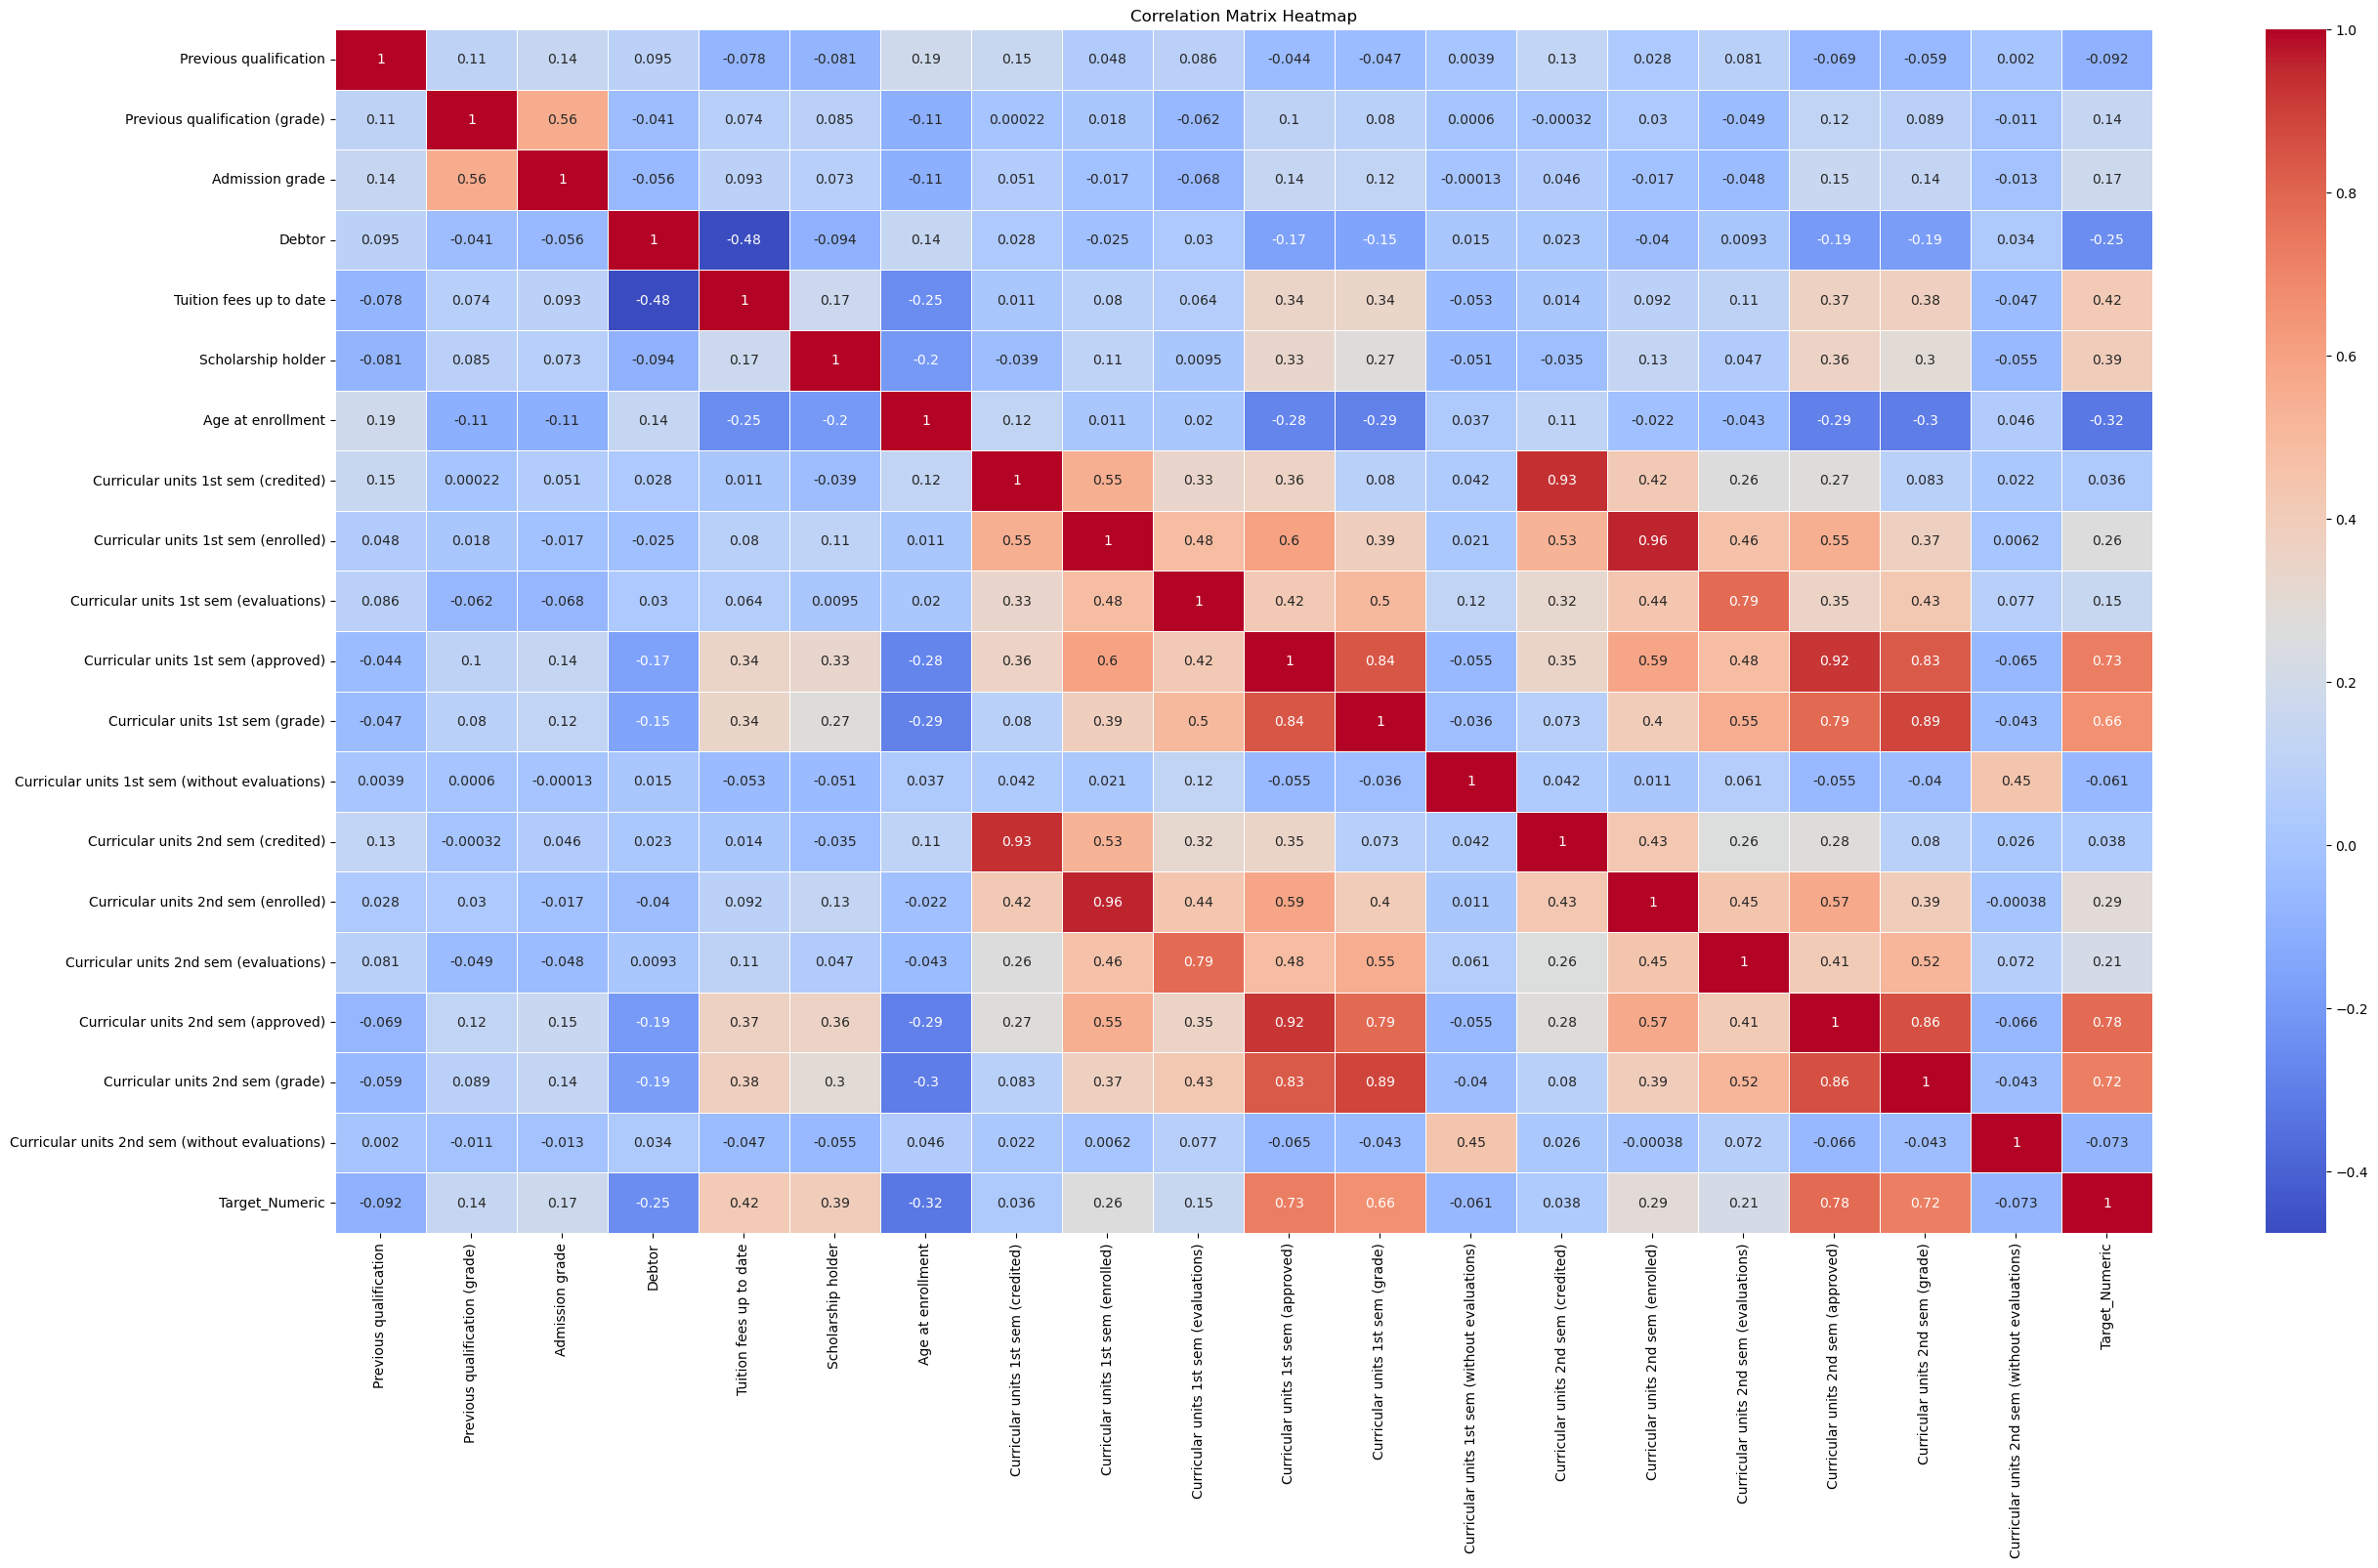

In [139]:
# Create a heatmap
plt.figure(figsize=(30, 16))
sns.heatmap(correaltion, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [200]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('object')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [123]:
import numpy as np
train_data = reduce_mem_usage(train_data)
train_data.info()

Memory usage of dataframe is 31.97 MB
Memory usage after optimization is: 6.12 MB
Decreased by 80.8%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108846 entries, 0 to 108845
Data columns (total 39 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   id                                              108846 non-null  int32  
 1   Marital status                                  108846 non-null  int8   
 2   Application mode                                108846 non-null  int8   
 3   Application order                               108846 non-null  int8   
 4   Course                                          108846 non-null  int16  
 5   Daytime/evening attendance                      108846 non-null  int8   
 6   Previous qualification                          108846 non-null  int8   
 7   Previous qualification (grade)                  108846 non-null  float16
 8   Nac

In [201]:
test_data = reduce_mem_usage(test_data)
test_data.info()

Memory usage of dataframe is 14.40 MB
Memory usage after optimization is: 2.43 MB
Decreased by 83.1%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int32  
 1   Marital status                                  51012 non-null  int8   
 2   Application mode                                51012 non-null  int8   
 3   Application order                               51012 non-null  int8   
 4   Course                                          51012 non-null  int16  
 5   Daytime/evening attendance                      51012 non-null  int8   
 6   Previous qualification                          51012 non-null  int8   
 7   Previous qualification (grade)                  51012 non-null  float16
 8   Nacionality    

In [124]:
y = train_data['Target']

In [125]:
X=train_data.drop(['id','Target_Numeric','Target'],axis=1)

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

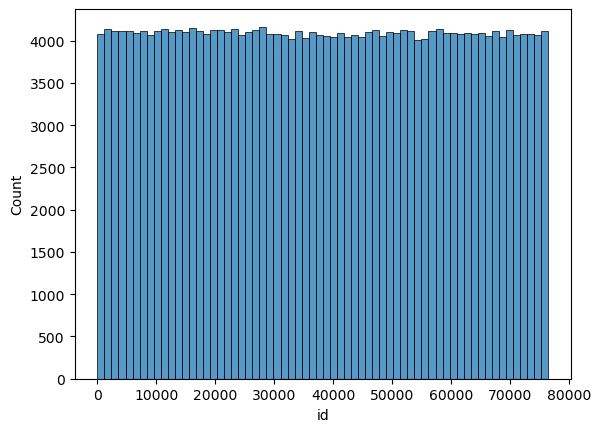

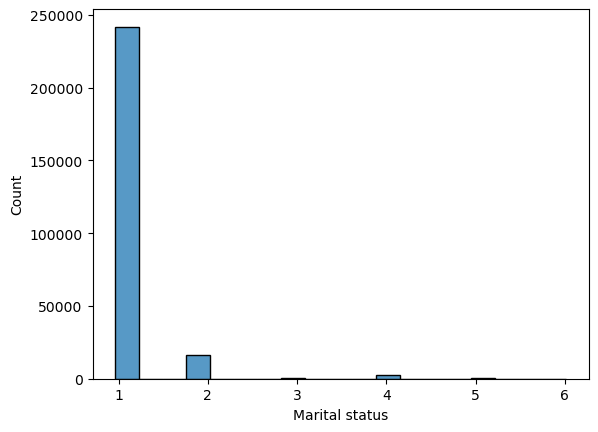

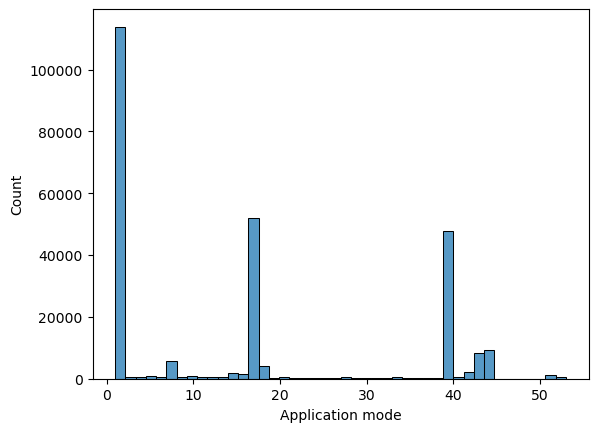

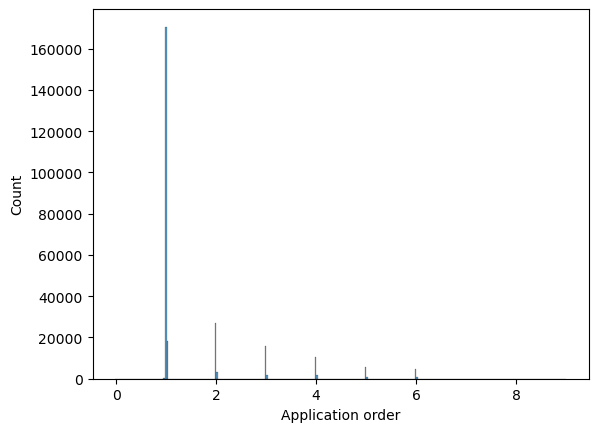

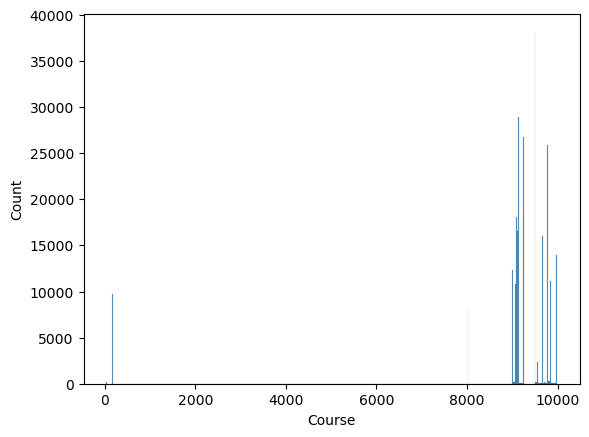

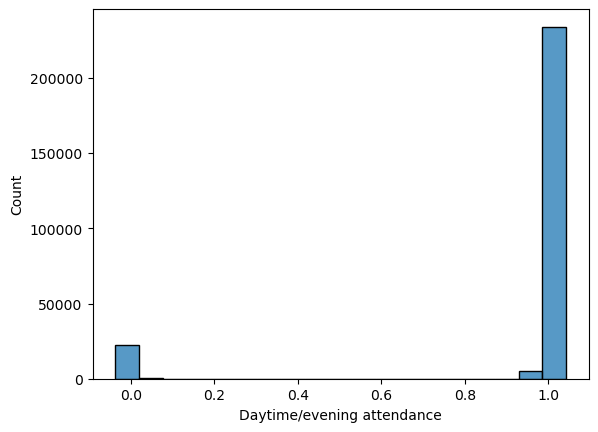

In [ ]:
warnings.filterwarnings("ignore")
print(train_data.select_dtypes(include="number").columns)
for i in train_data.select_dtypes(include="number").columns:
    sns.histplot(data=train_data,x=i)
    plt.show()

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

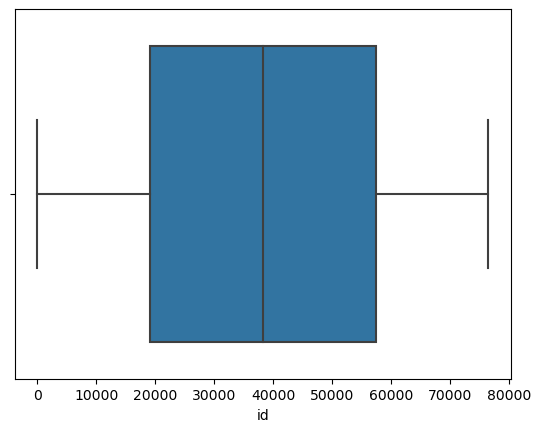

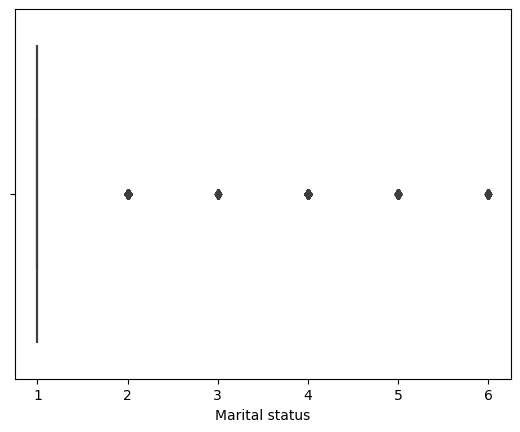

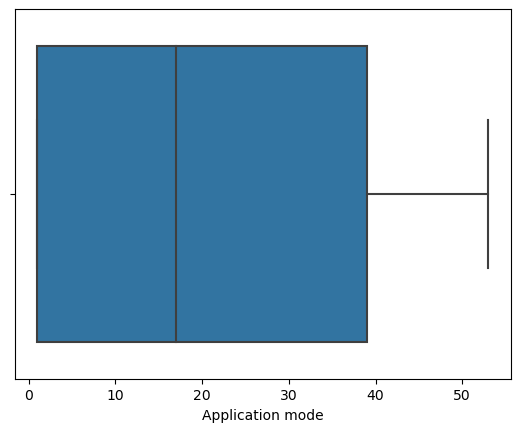

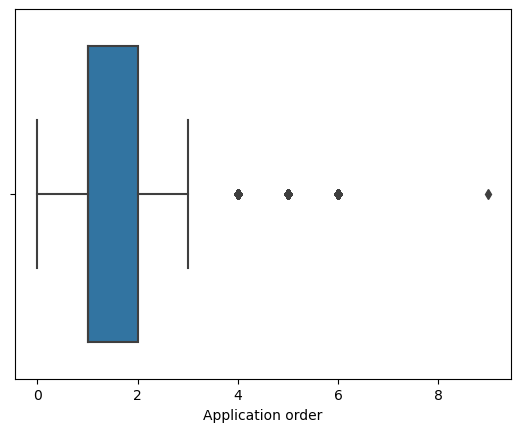

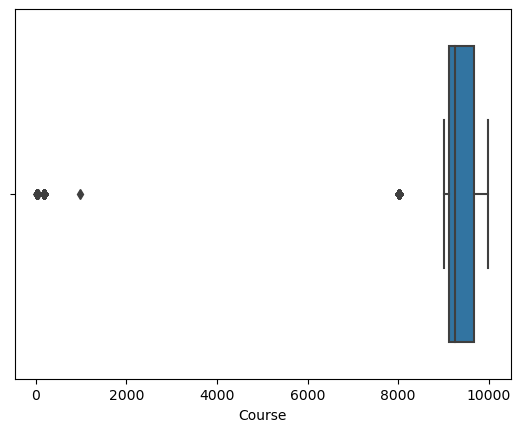

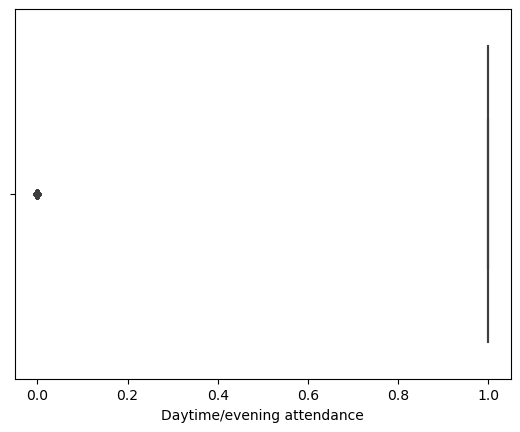

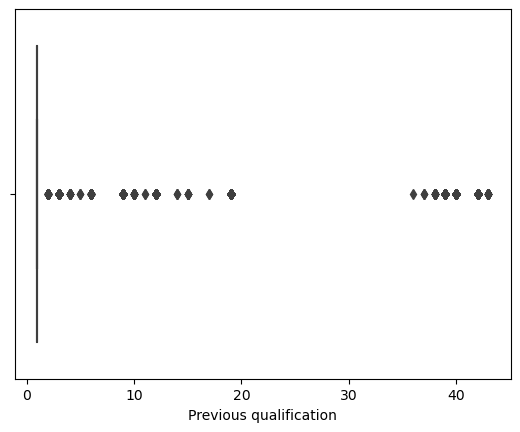

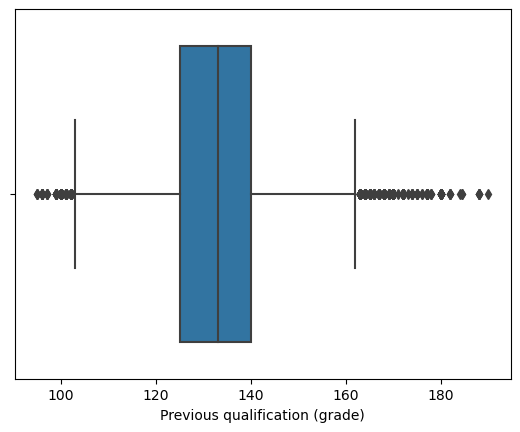

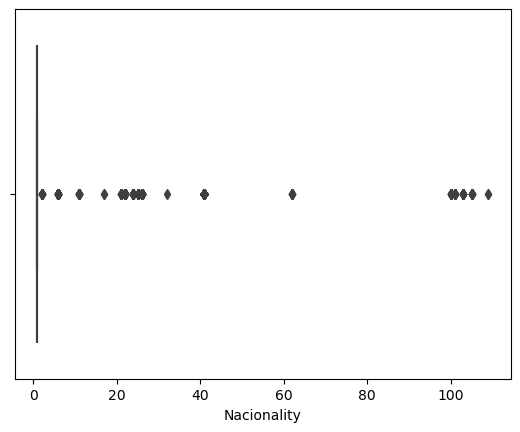

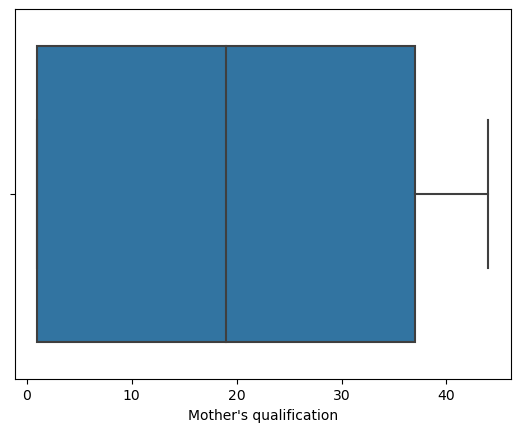

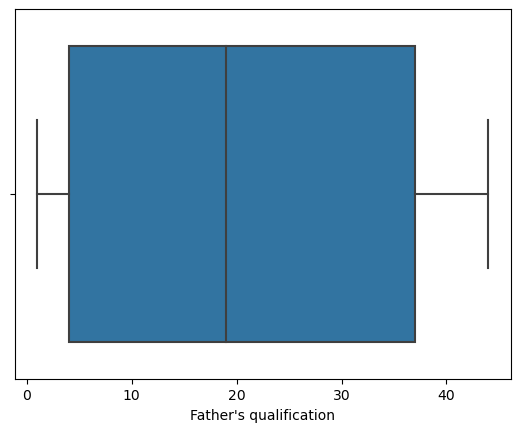

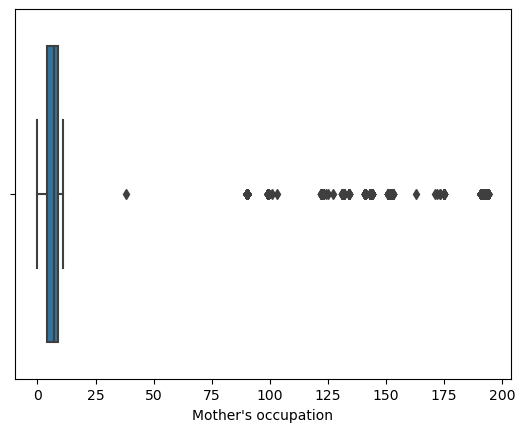

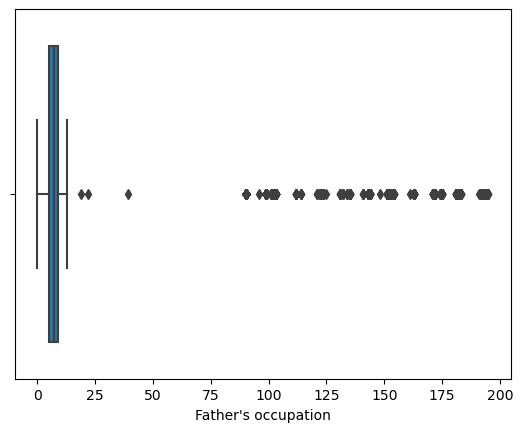

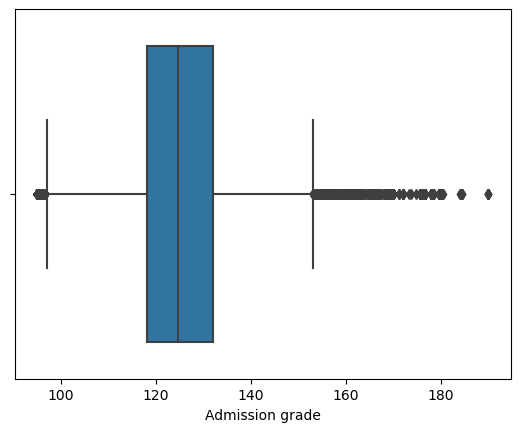

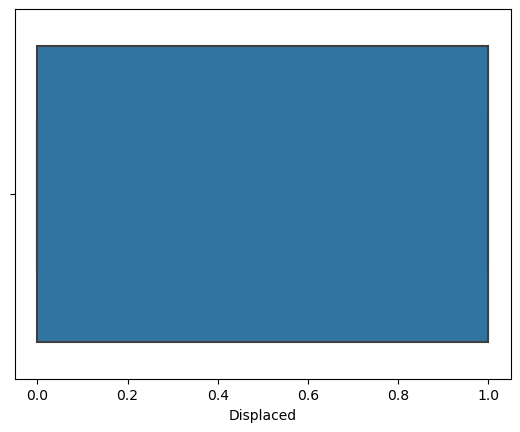

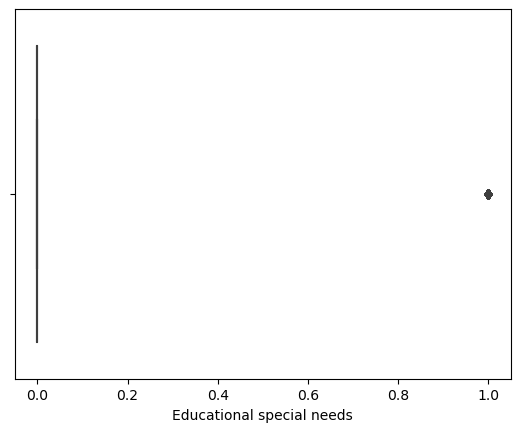

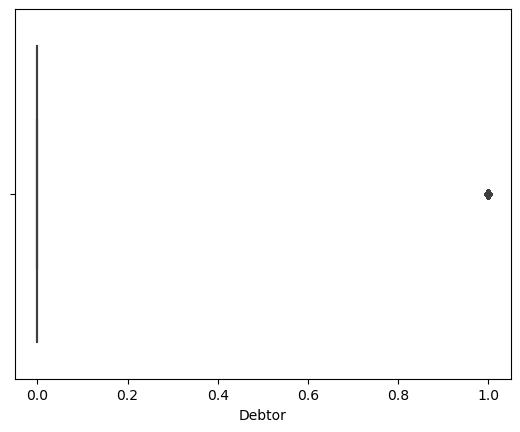

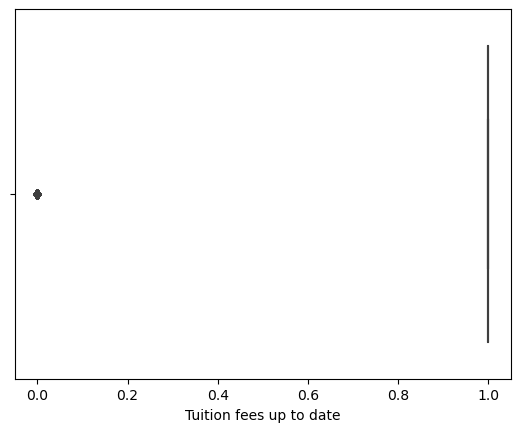

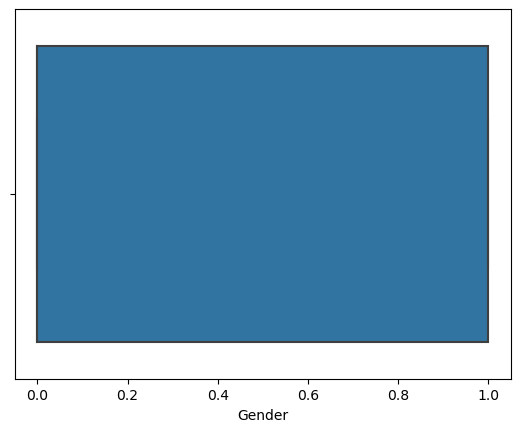

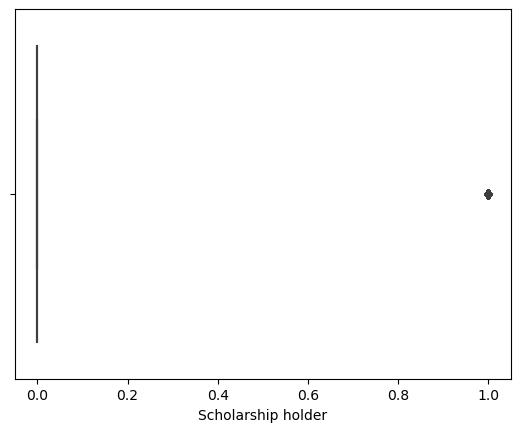

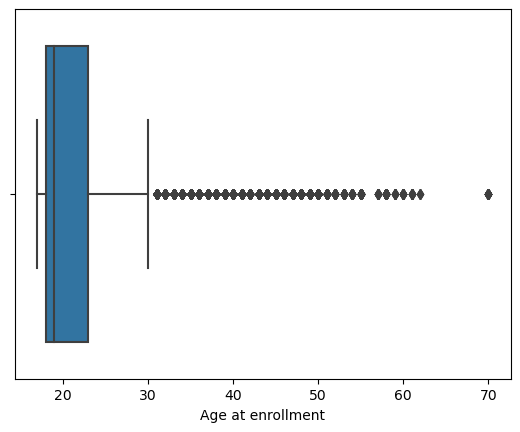

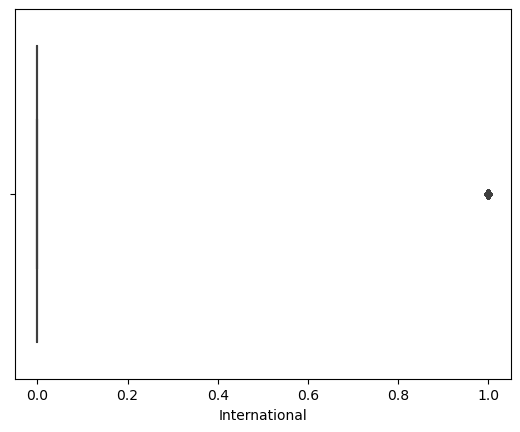

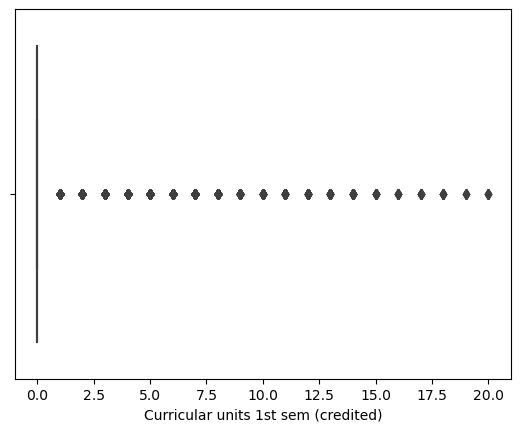

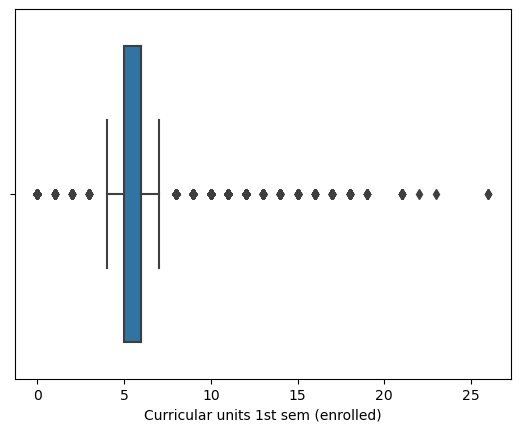

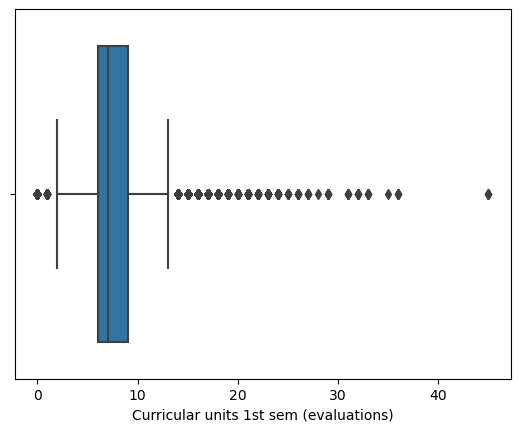

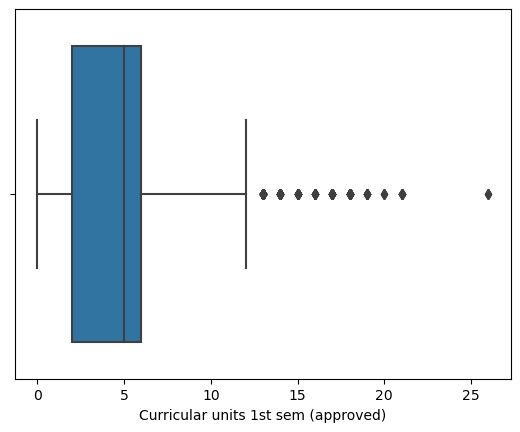

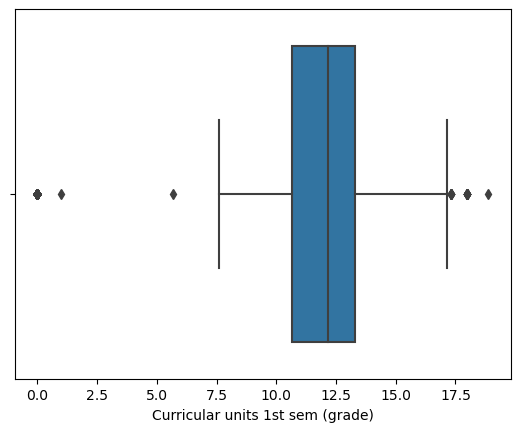

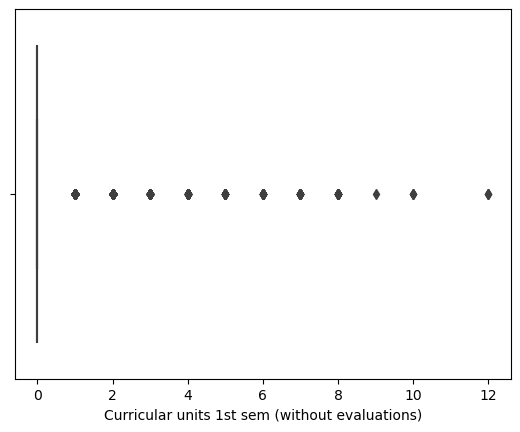

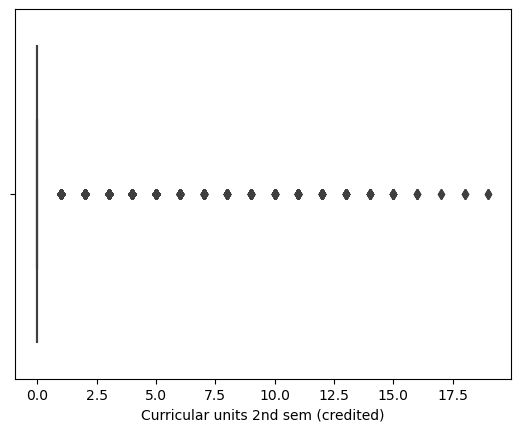

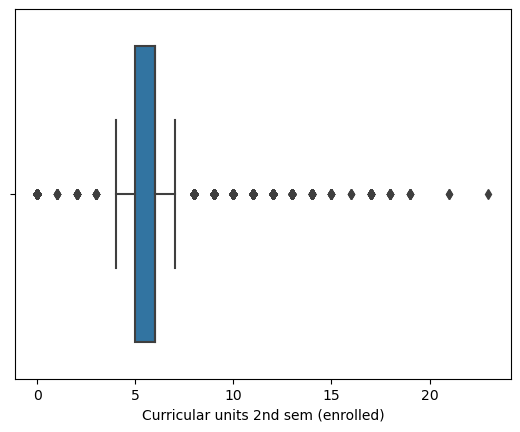

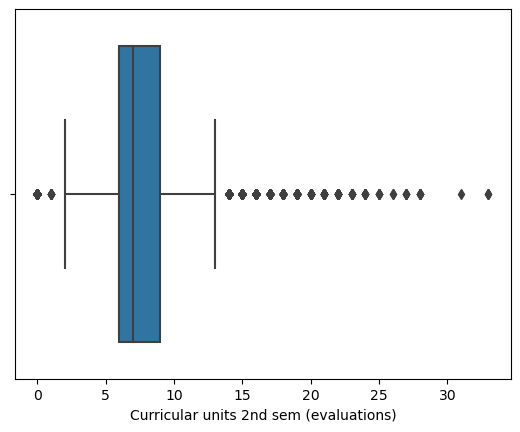

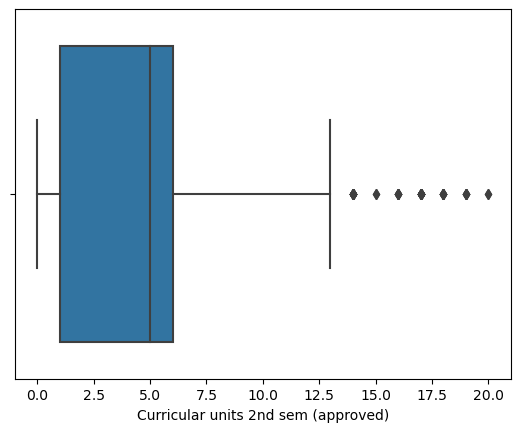

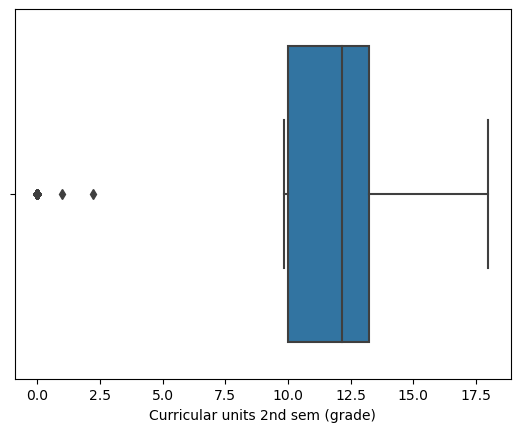

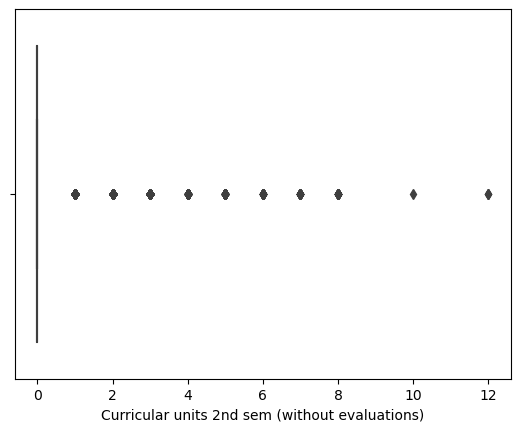

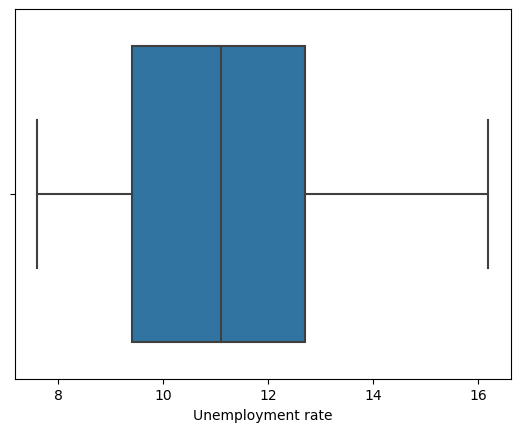

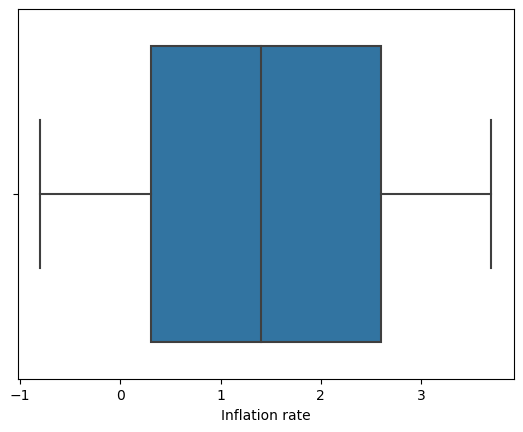

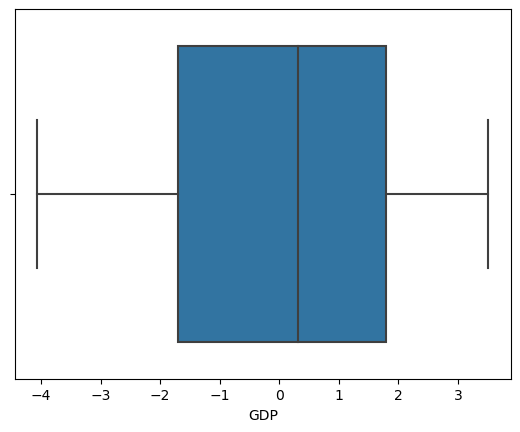

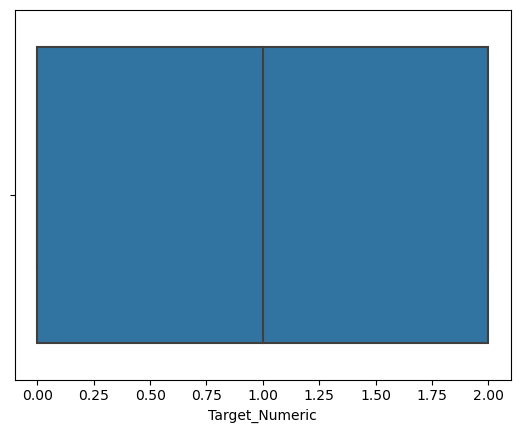

In [18]:
warnings.filterwarnings("ignore")
print(train_data.select_dtypes(include="number").columns)
for i in train_data.select_dtypes(include="number").columns:
    sns.boxplot(data=train_data,x=i)
    plt.show()

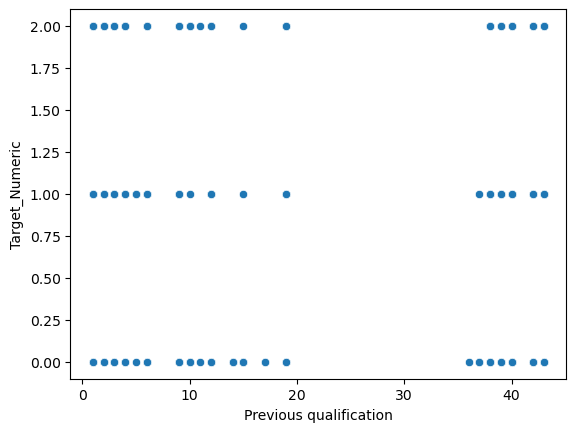

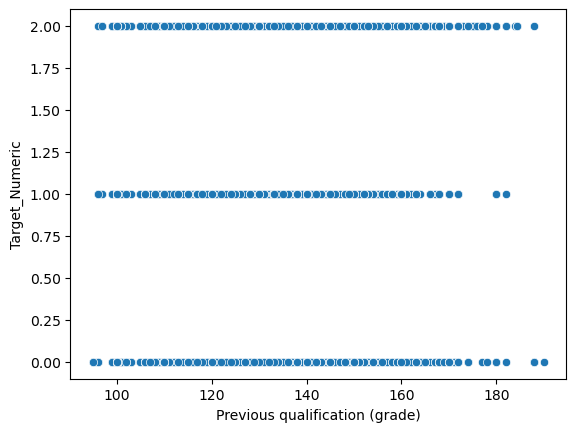

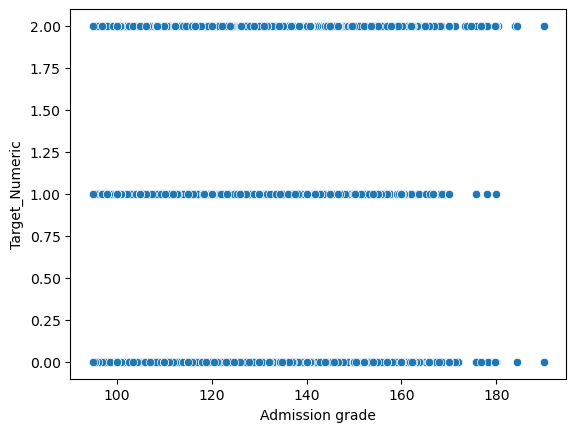

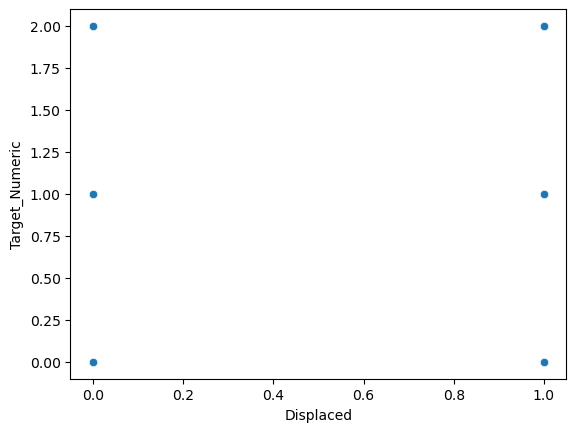

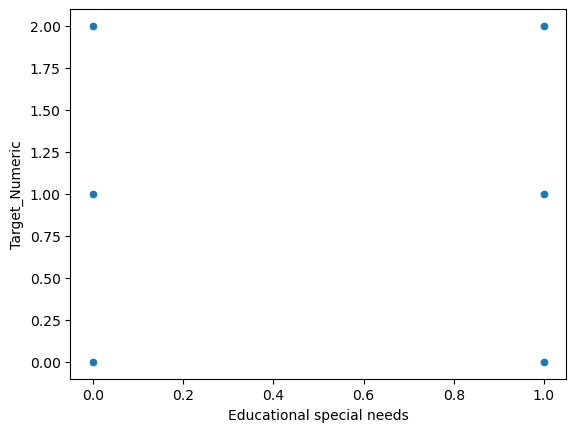

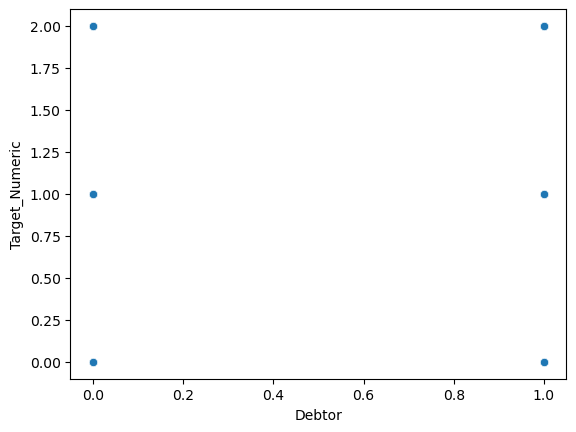

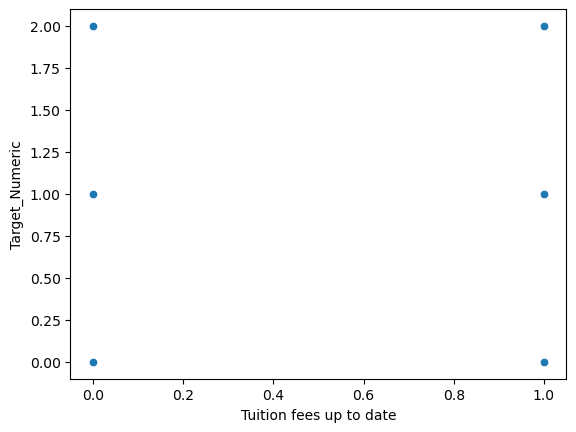

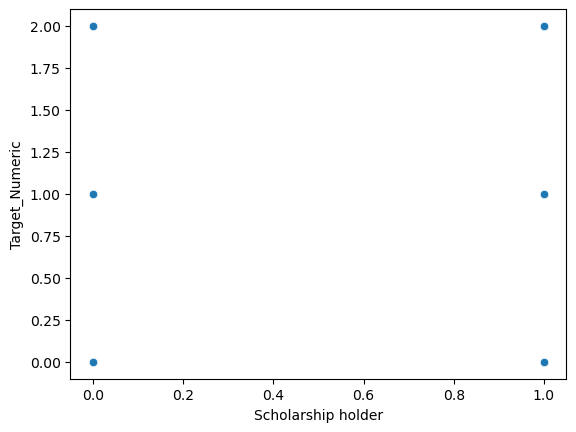

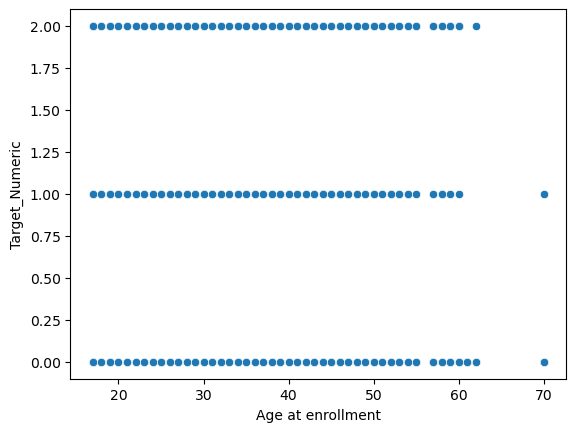

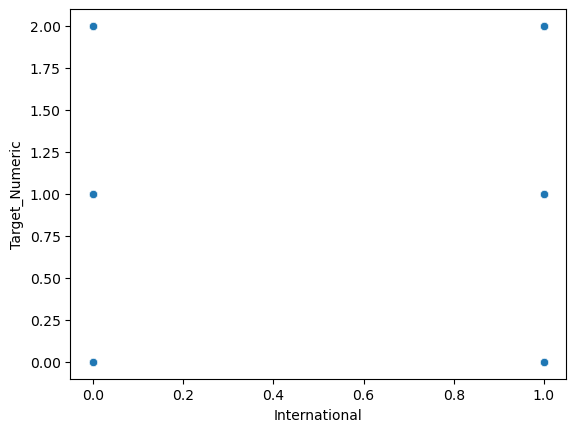

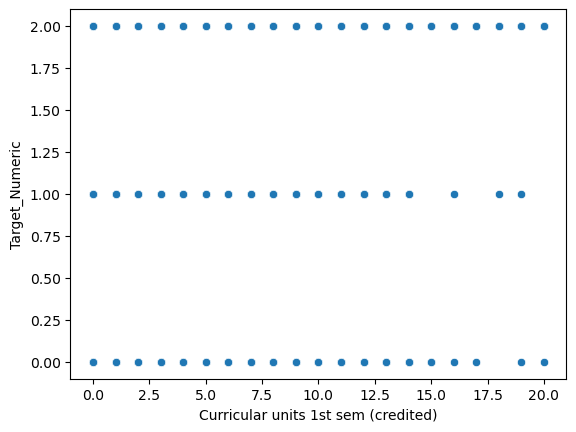

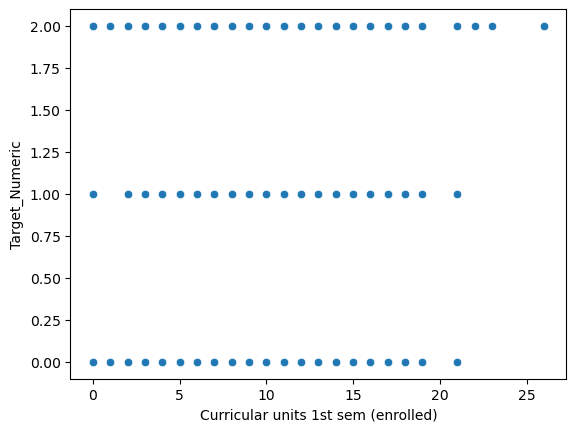

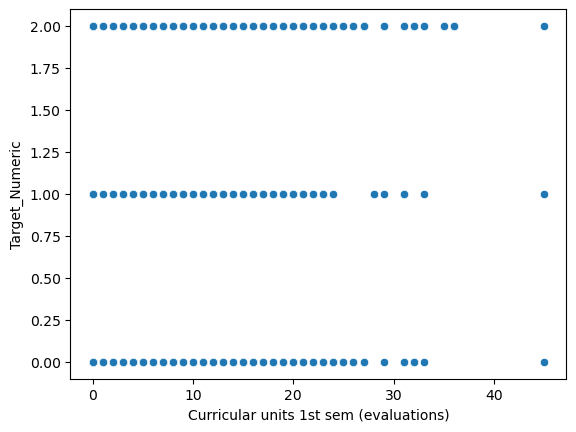

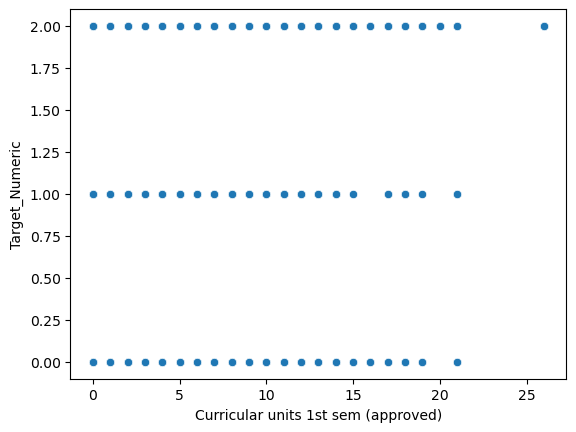

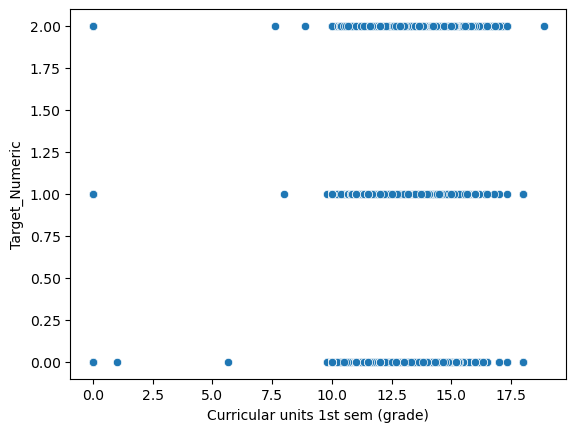

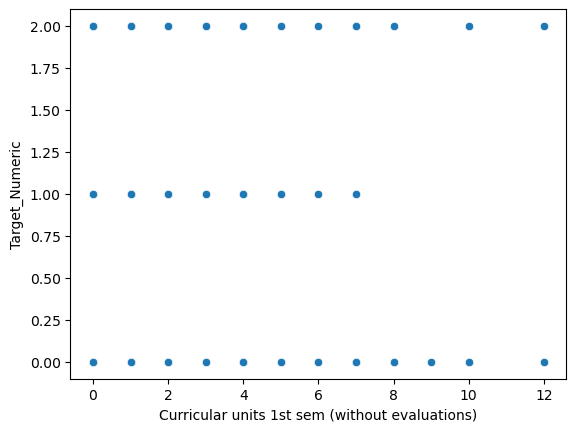

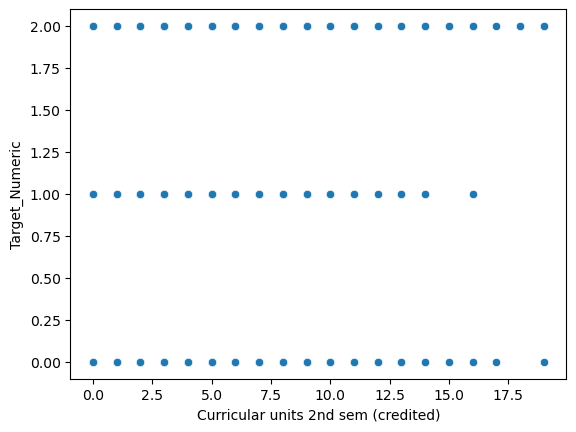

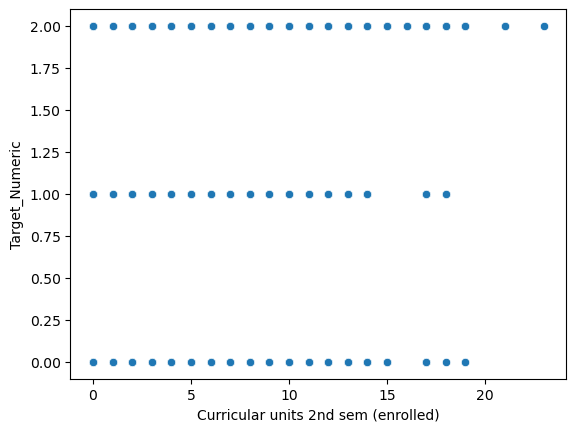

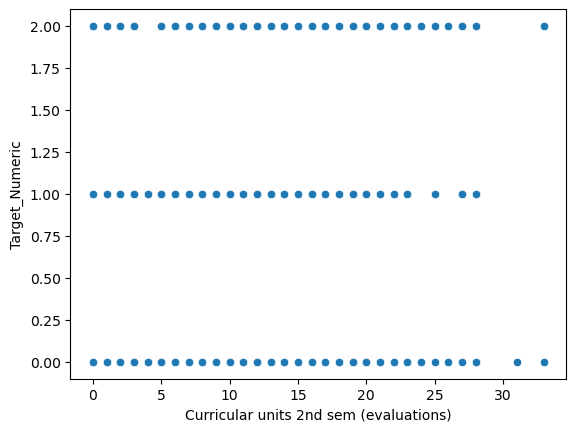

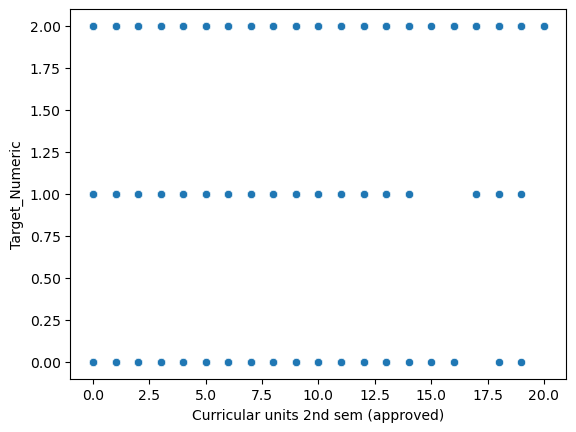

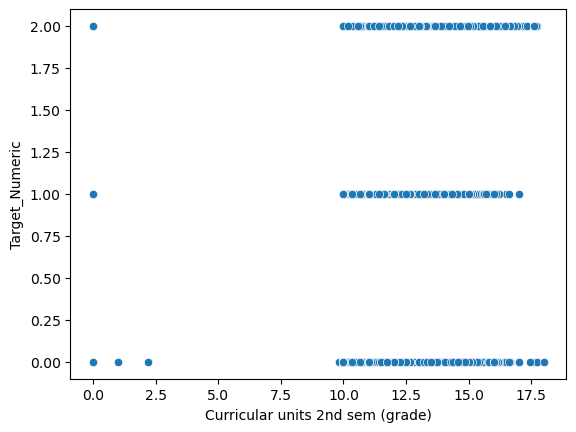

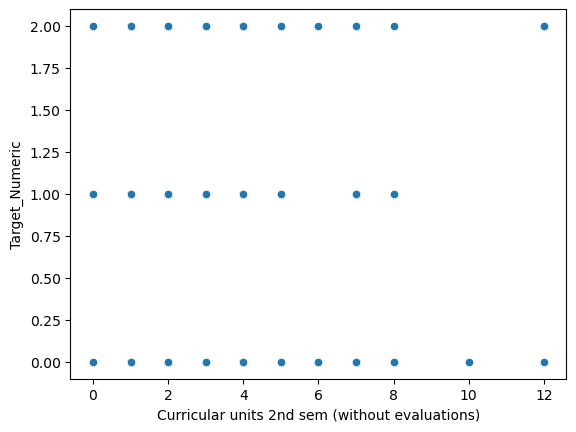

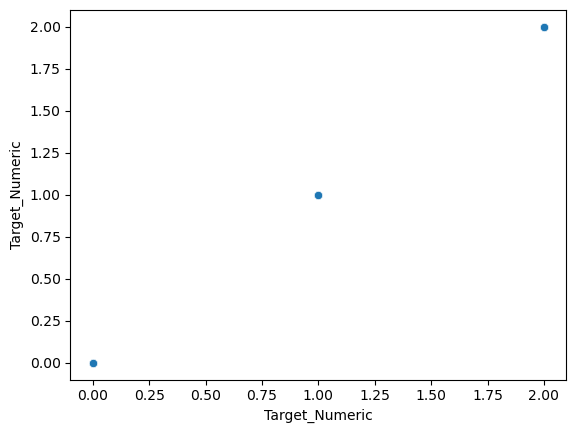

In [19]:
for  i in num_cols:
    sns.scatterplot(data=train_data,x=i,y='Target_Numeric')
    plt.show()
    

In [194]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [40]:
# Example interaction features
train_data['Age*AdmissionGrade'] = train_data['Age at enrollment'] * train_data['Admission grade']
train_data['CurricularUnits1stSem*2ndSemGrade'] = train_data['Curricular units 1st sem (grade)'] * train_data['Curricular units 2nd sem (grade)']

In [172]:
# Aggregate features
train_data['TotalCredits'] = (train_data['Curricular units 1st sem (credited)'] + train_data['Curricular units 2nd sem (credited)']
train_data['TotalApproved'] = train_data['Curricular units 1st sem (approved)'] + train_data['Curricular units 2nd sem (approved)']
train_data['TotalGrades'] = (train_data['Curricular units 1st sem (grade)'] + train_data['Curricular units 2nd sem (grade)']) / 2


In [41]:
# Clean column names to remove whitespace and special characters
X.columns = X.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [42]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Interaction Features
X['interaction_1'] = X['Admission_grade'] * X['Previous_qualification_grade']
X['interaction_2'] = X['Curricular_units_1st_sem_grade'] * X['Curricular_units_2nd_sem_grade']

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[['Admission_grade', 'Previous_qualification_grade']])
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(['Admission_grade', 'Previous_qualification_grade']))
X = pd.concat([X, X_poly_df], axis=1)

# Log Transform (only apply to positively skewed features)
#X['log_Admission_grade'] = np.log1p(X['Admission_grade'])
#X['log_Previous_qualification_grade'] = np.log1p(X['Previous_qualification_grade'])

# Binning
X['age_bin'] = pd.cut(X['Age_at_enrollment'], bins=[15, 20, 25, 30, 35, 40, 45, 50, 100], labels=False)



In [43]:
# Drop original columns after transformation if necessary
X = X.drop(columns=['Admission_grade', 'Previous_qualification_grade', 'Age_at_enrollment'])


In [148]:
sns.pairplot(train_data, hue='Target_Numeric')
plt.show()



KeyboardInterrupt: 

In [229]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Isolation Forest
#iso_forest = IsolationForest(contamination=0.05, random_state=42)
#outliers_iso = iso_forest.fit_predict(X_scaled)
#mask_iso = outliers_iso != -1

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers_lof = lof.fit_predict(X_scaled)
mask_lof = outliers_lof != -1

# Filtered data without outliers (using Isolation Forest)
X_no_outliers = X[mask_lof]
y_no_outliers = y[mask_lof]

In [230]:
X_no_outliers

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,0,7,12,6,12.933333,0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76511,1,17,1,9773,1,1,138.0,1,1,19,...,0,0,6,6,6,13.000000,0,12.4,0.5,1.79
76512,1,1,1,9238,1,1,134.0,1,19,38,...,0,0,6,6,6,12.166667,0,7.6,2.6,0.32
76513,1,17,1,9254,1,1,121.0,1,19,1,...,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79
76516,1,1,3,9070,1,1,136.0,1,38,37,...,0,0,6,0,0,0.000000,0,7.6,2.6,0.32


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

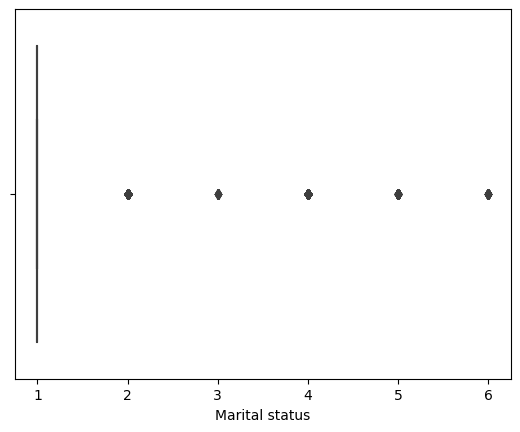

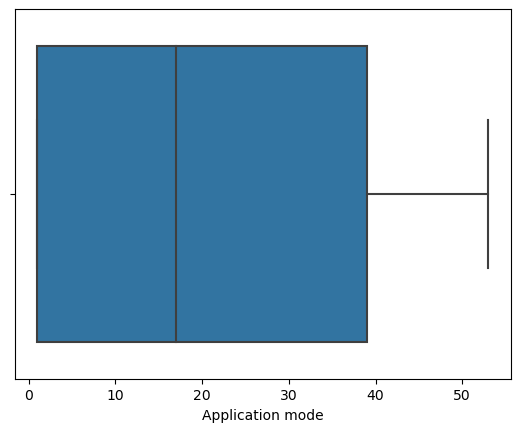

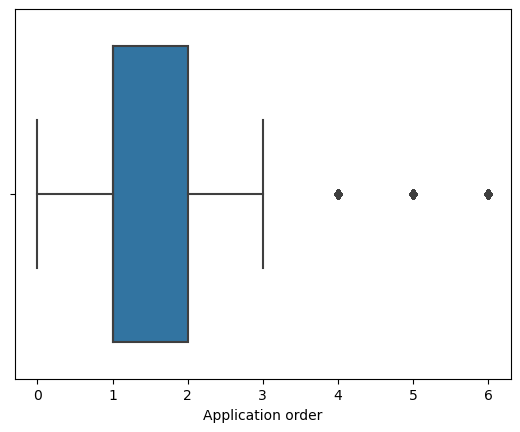

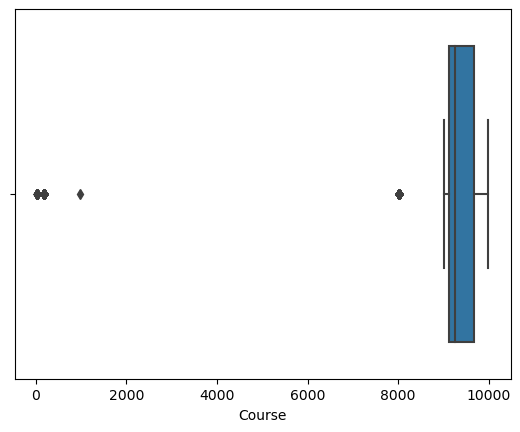

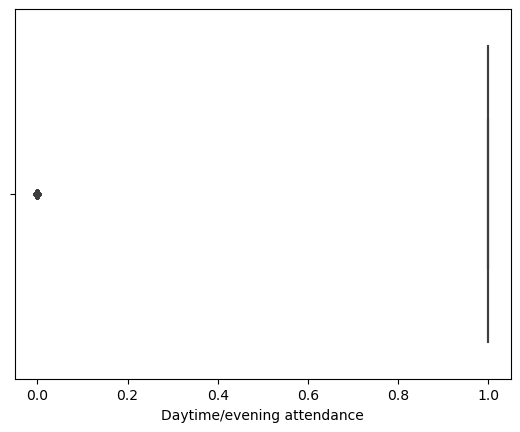

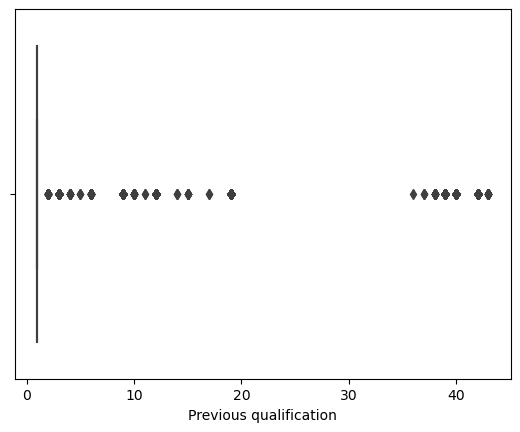

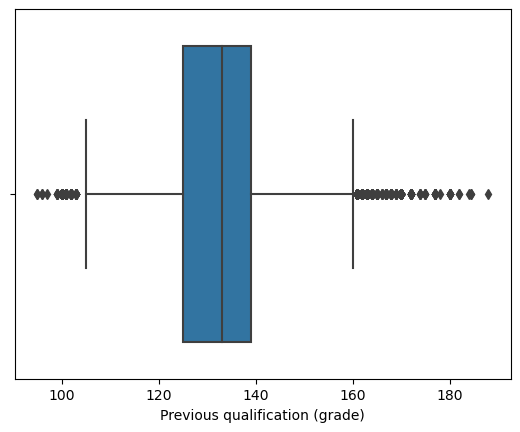

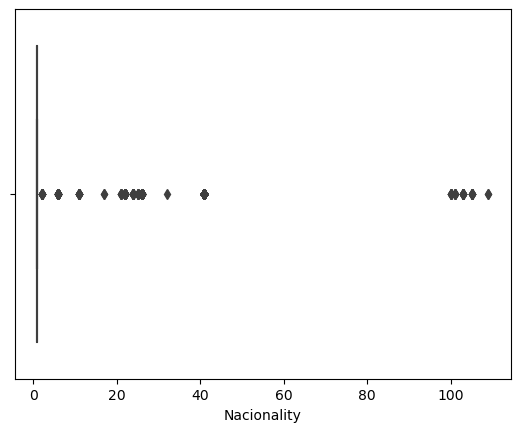

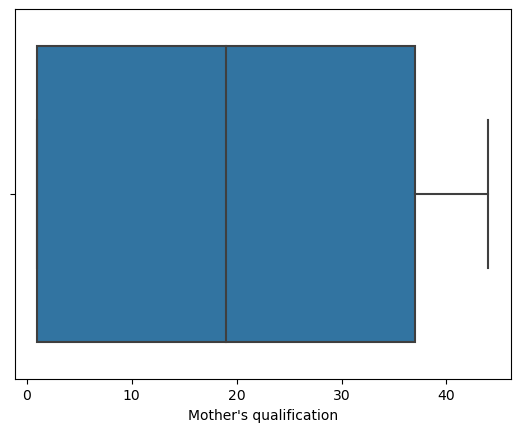

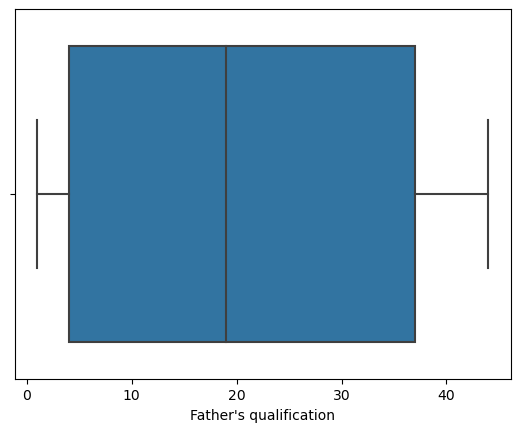

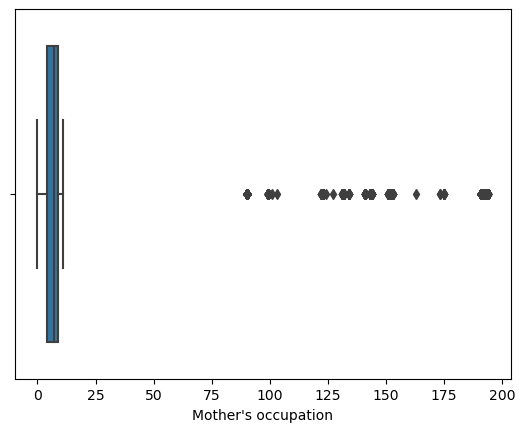

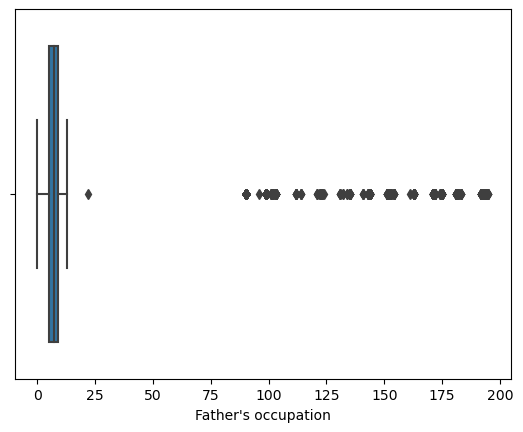

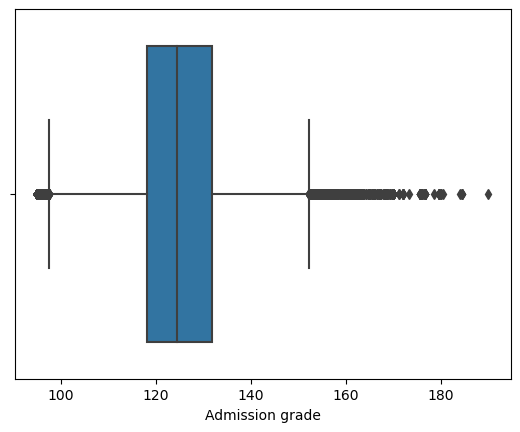

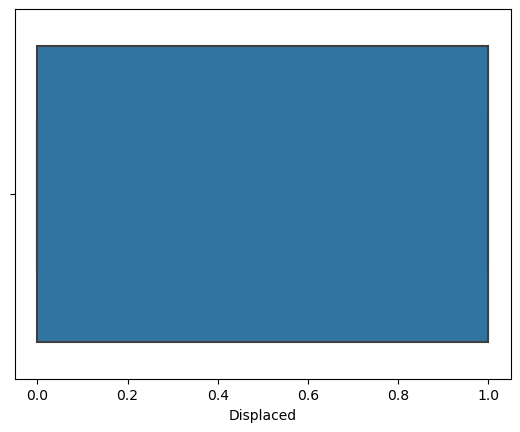

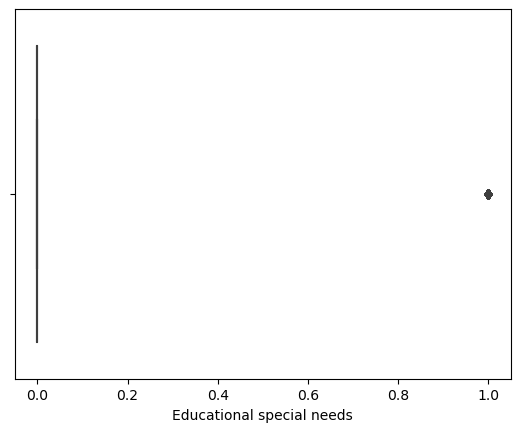

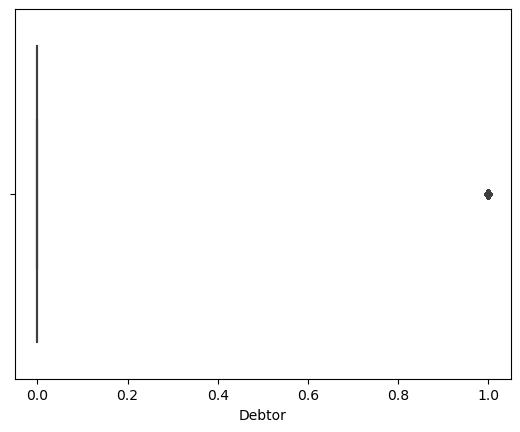

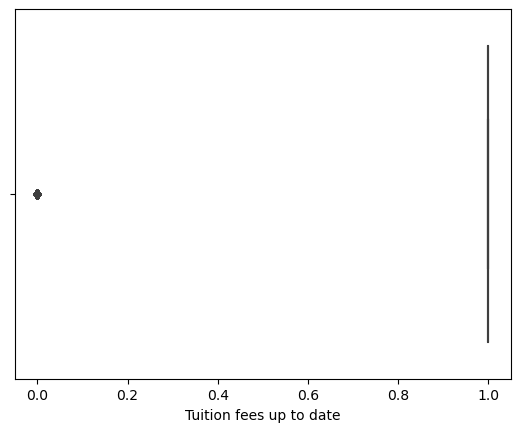

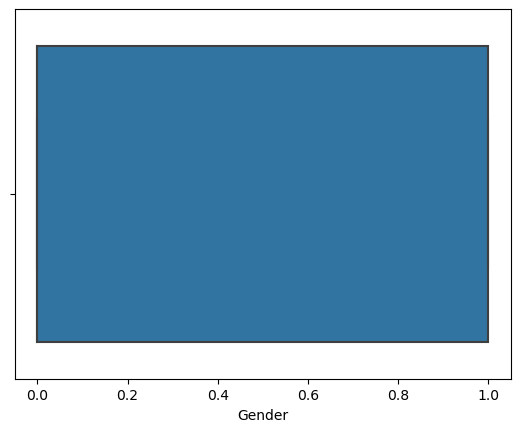

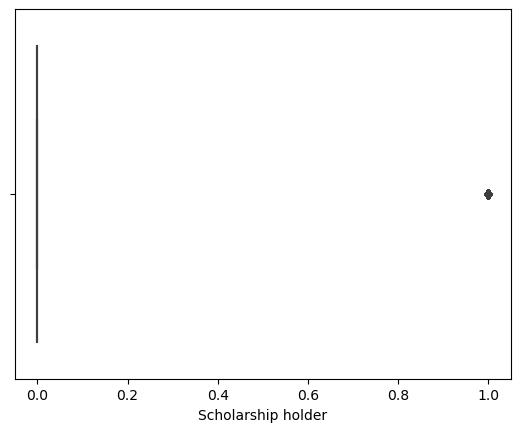

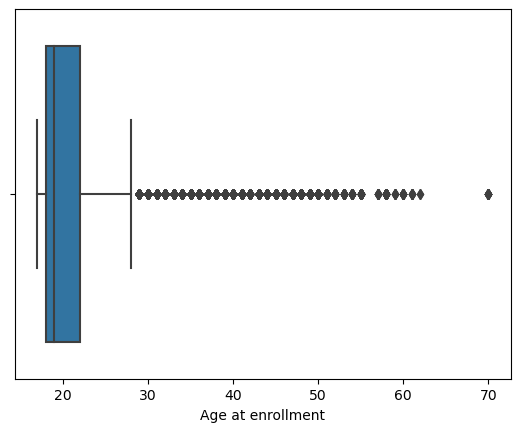

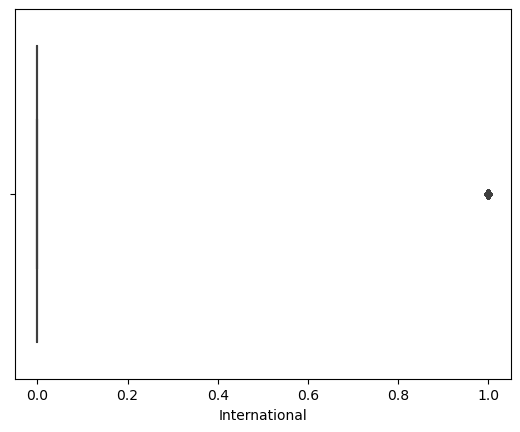

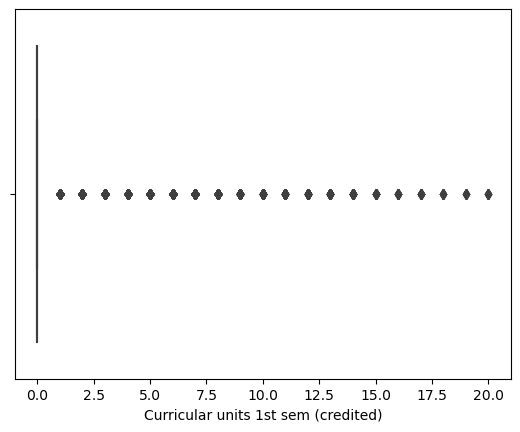

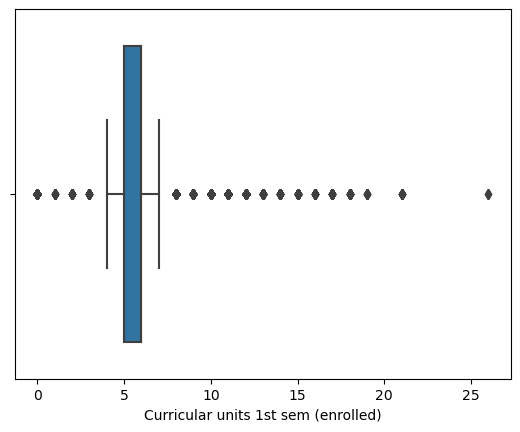

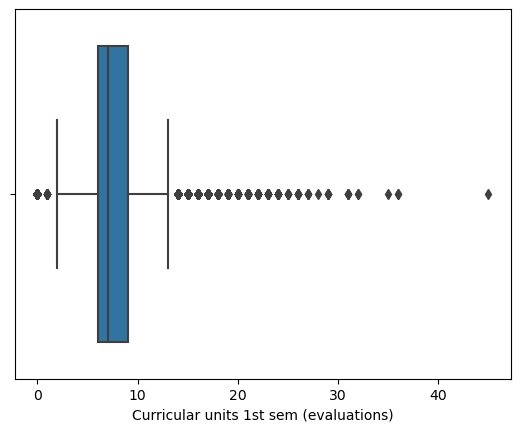

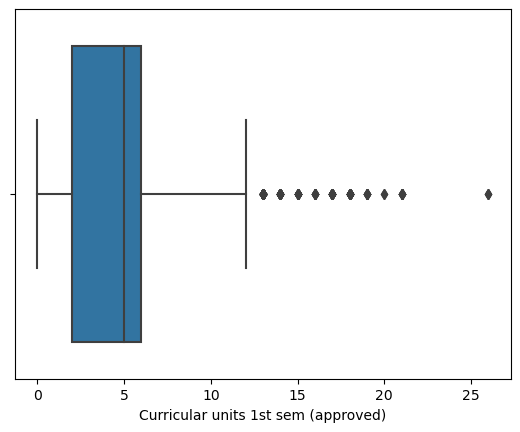

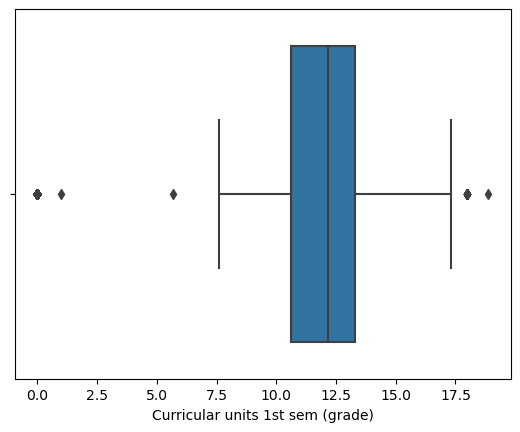

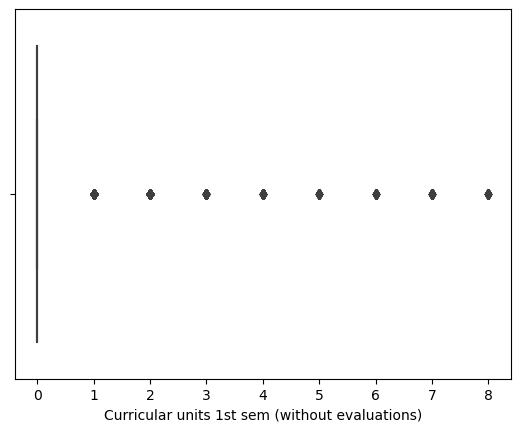

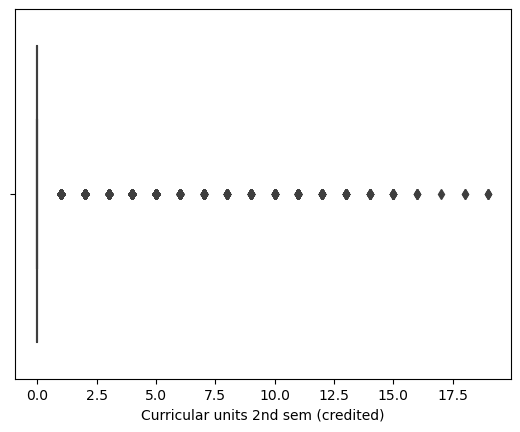

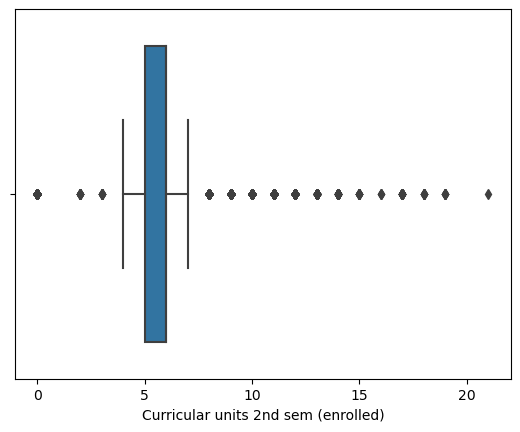

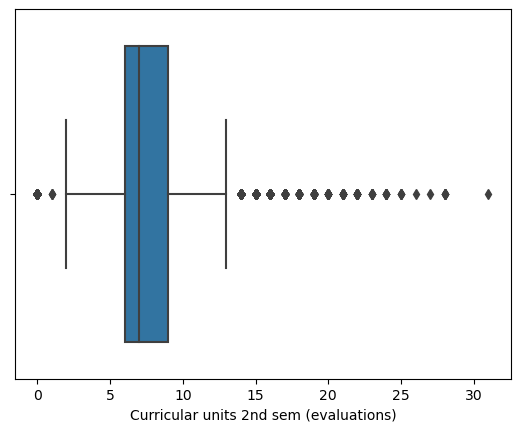

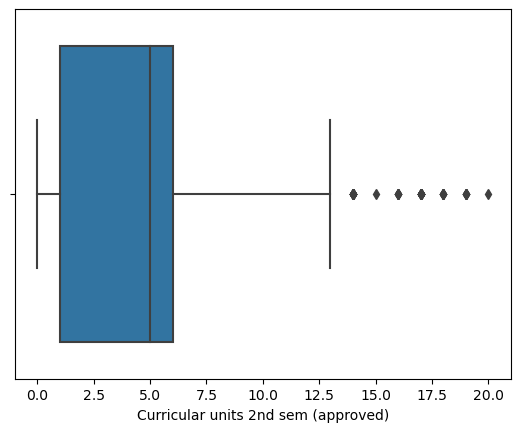

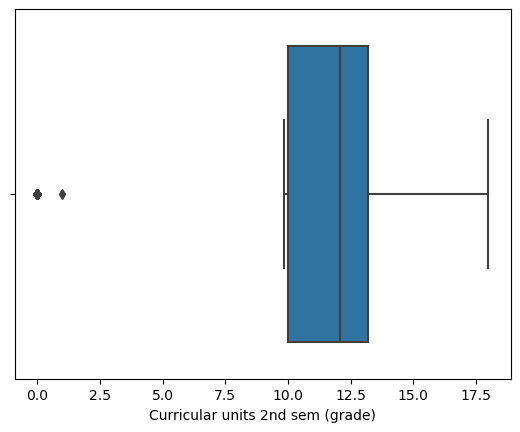

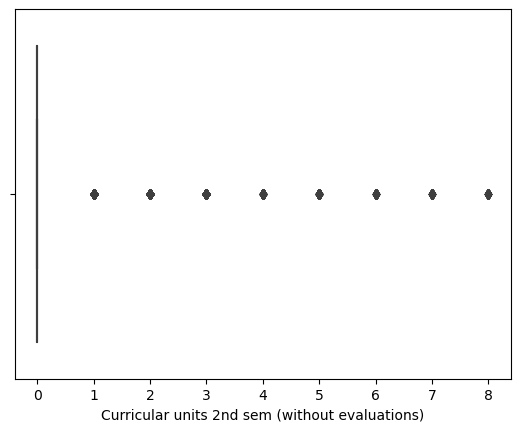

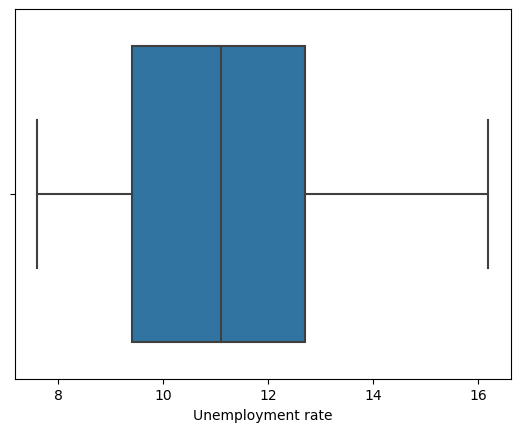

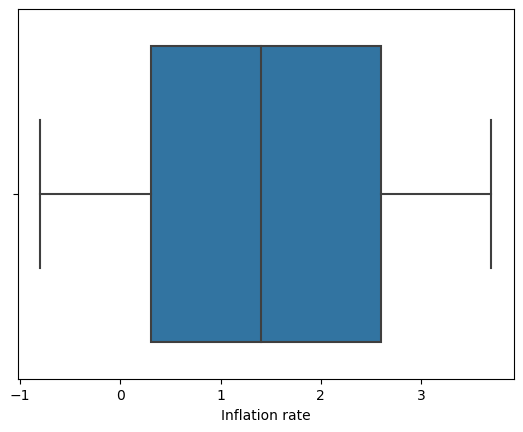

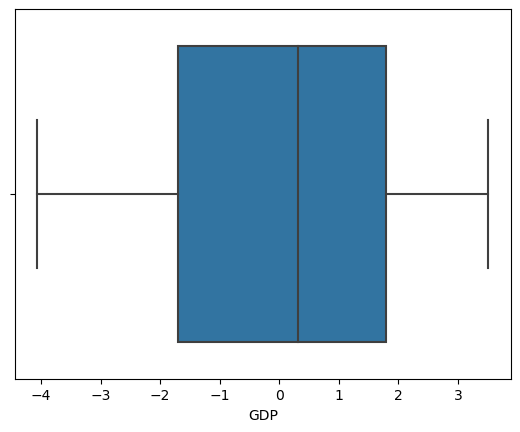

In [231]:
warnings.filterwarnings("ignore")
print(X_no_outliers.select_dtypes(include="number").columns)
for i in X_no_outliers.select_dtypes(include="number").columns:
    sns.boxplot(data=X_no_outliers,x=i)
    plt.show()

Index(['TotalApproved', 'Curricular units 2nd sem (approved)',
       'Curricular units 1st sem (approved)', 'TotalGrades',
       'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)', 'Admission grade',
       'Curricular units 1st sem (evaluations)',
       'Previous qualification (grade)', 'Age at enrollment',
       'Tuition fees up to date', 'Father's occupation', 'Course',
       'Mother's occupation', 'Scholarship holder', 'Application mode', 'GDP',
       'Unemployment rate', 'Mother's qualification'],
      dtype='object')


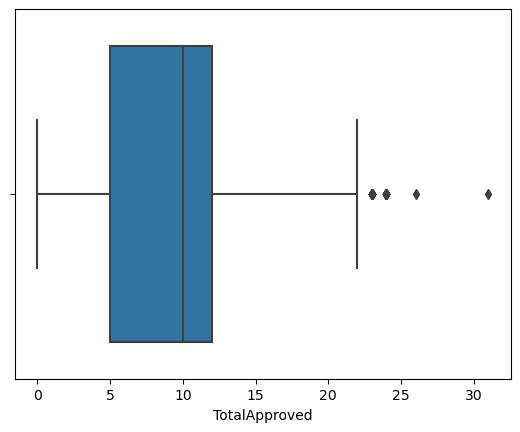

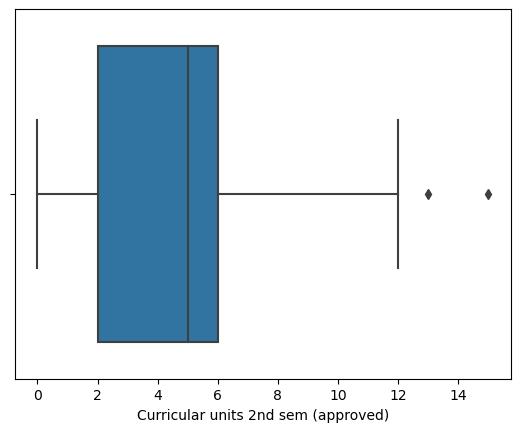

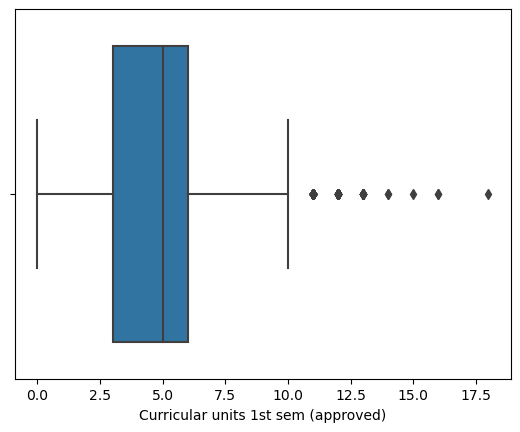

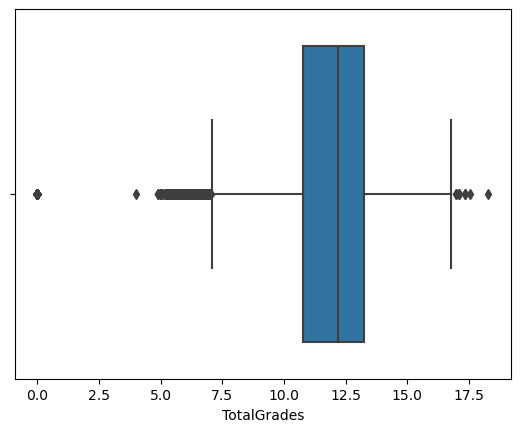

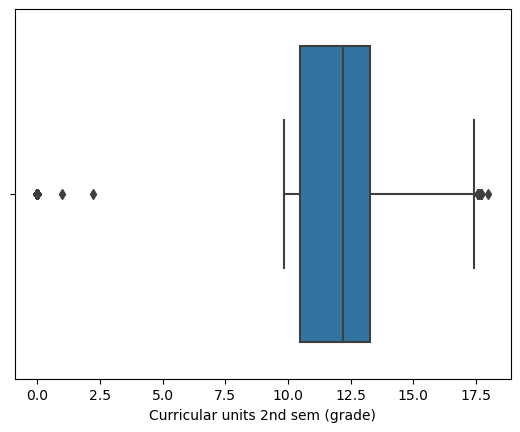

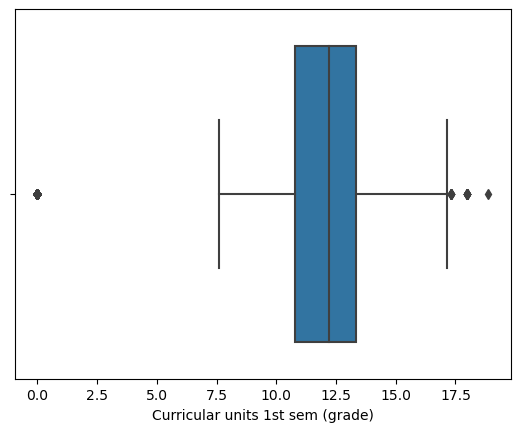

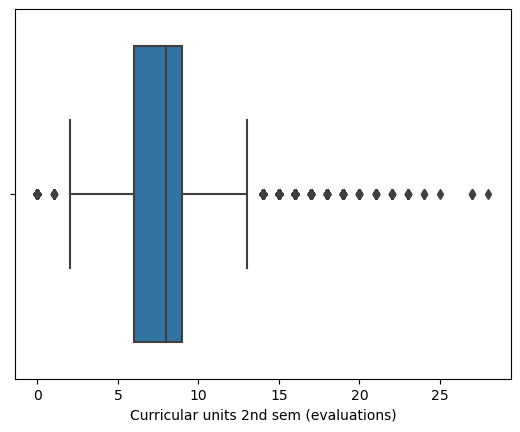

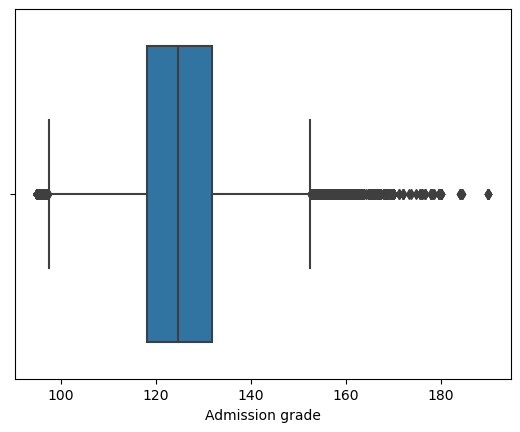

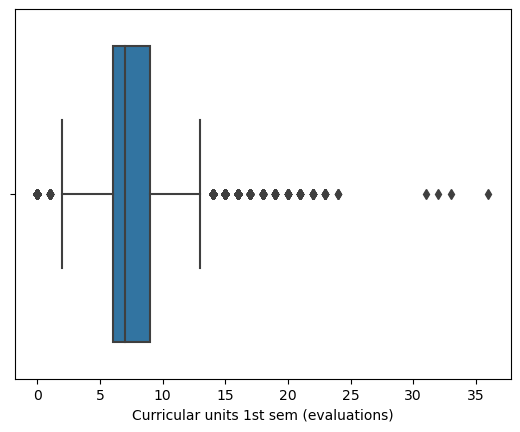

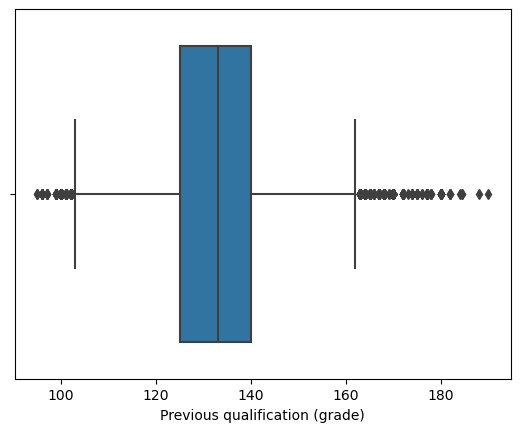

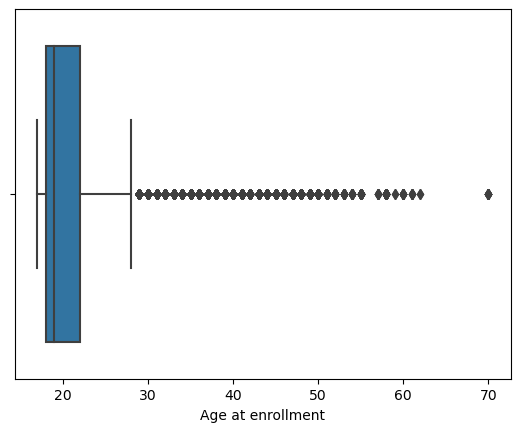

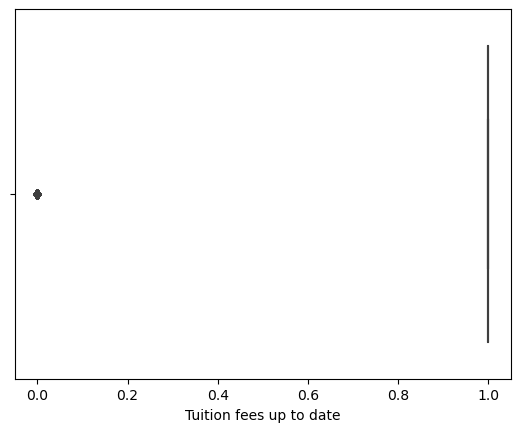

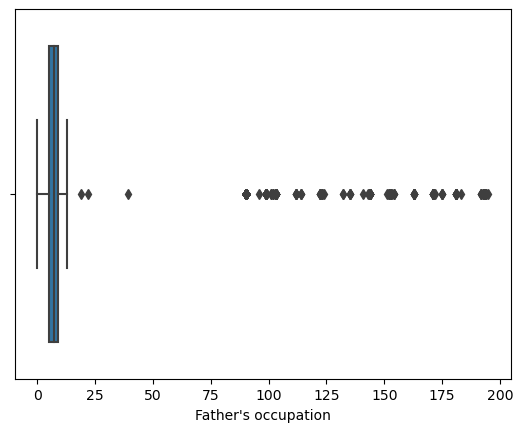

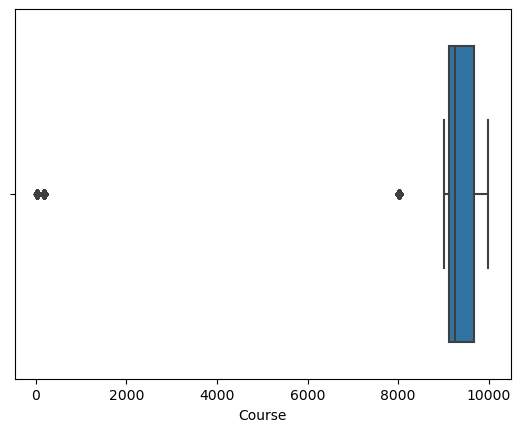

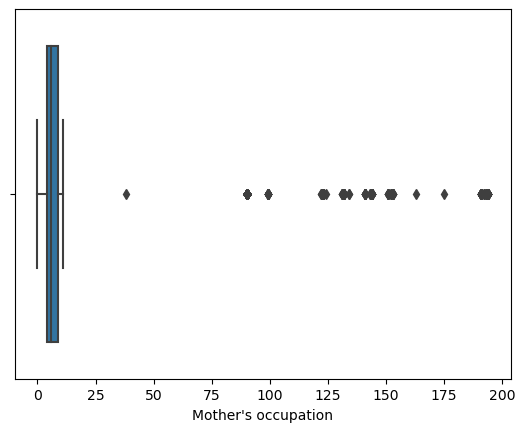

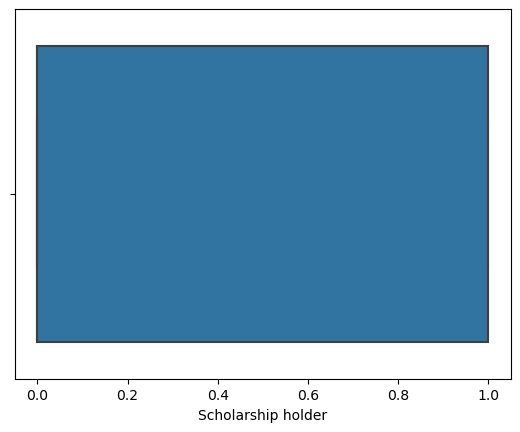

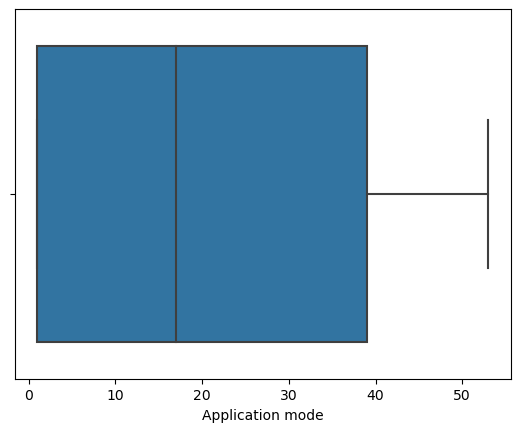

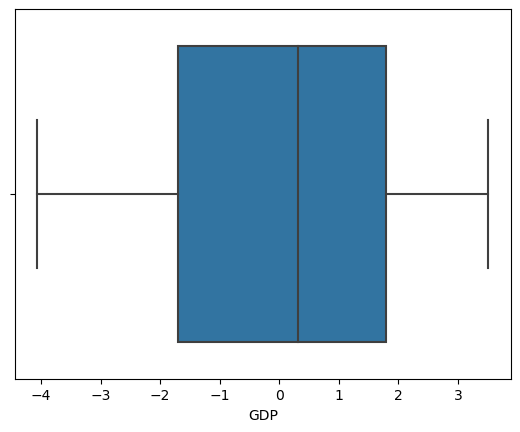

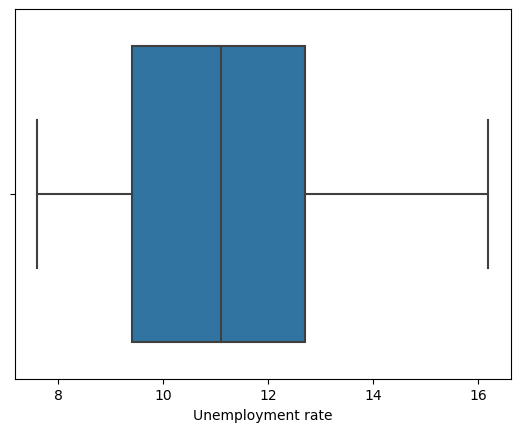

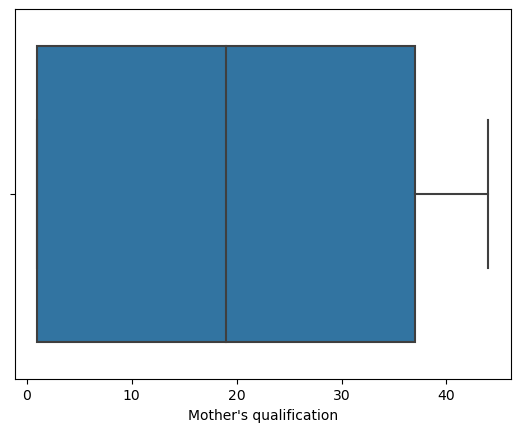

In [204]:
warnings.filterwarnings("ignore")
print(X_no_outliers.select_dtypes(include="number").columns)
for i in X_no_outliers.select_dtypes(include="number").columns:
    sns.boxplot(data=X_no_outliers,x=i)
    plt.show()

In [103]:
# Domain-specific features
train_data['IsAdult'] = (train_data['Age at enrollment'] >= 18).astype(int)
train_data['HasScholarshipAndDebtor'] = ((train_data['Scholarship holder'] == 1) & (train_data['Debtor'] == 1)).astype(int)


In [104]:
y = train_data['Target_Numeric']
X=train_data[num_cols]


In [173]:
# Aggregate features
X['TotalCredits'] = (train_data['Curricular units 1st sem (credited)'] + train_data['Curricular units 2nd sem (credited)'])/2
X['TotalApproved'] = (train_data['Curricular units 1st sem (approved)'] + train_data['Curricular units 2nd sem (approved)'])/2
X['TotalGrades'] = (train_data['Curricular units 1st sem (grade)'] + train_data['Curricular units 2nd sem (grade)']) / 2


In [71]:
X = X.drop(['Target_Numeric','Curricular units 1st sem (credited)','Curricular units 2nd sem (credited)','Curricular units 1st sem (approved)',
           'Curricular units 2nd sem (approved)','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)'],axis=1)

In [111]:
X = X.drop(['Target_Numeric'],axis=1)

In [174]:
X.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)


In [233]:
train_data.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [103]:
from sklearn.ensemble import RandomForestClassifier
importances = RandomForestClassifier().fit(X, y).feature_importances_

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

# Select top features
top_features = feature_importance['Feature'].head(20).tolist()
X = X[top_features]


In [104]:
print(top_features)

['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (evaluations)', 'Admission grade', 'Tuition fees up to date', 'Curricular units 1st sem (evaluations)', 'Scholarship holder', 'Previous qualification (grade)', 'Age at enrollment', 'Course', 'Application mode', "Father's occupation", 'Unemployment rate', 'GDP', "Mother's qualification", 'Inflation rate', "Father's qualification", "Mother's occupation"]


In [176]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [142]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)


In [126]:
# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN model
k = 25  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8168455093341173
Confusion Matrix:
[[7163 1469  436]
 [ 615 7004 1346]
 [ 118 1000 8061]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.91      0.79      0.84      9068
    Enrolled       0.74      0.78      0.76      8965
    Graduate       0.82      0.88      0.85      9179

    accuracy                           0.82     27212
   macro avg       0.82      0.82      0.82     27212
weighted avg       0.82      0.82      0.82     27212



In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8519323819440191
Confusion Matrix:
[[9033 1353  495]
 [ 715 8834 1230]
 [ 151  891 9952]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.91      0.83      0.87     10881
    Enrolled       0.80      0.82      0.81     10779
    Graduate       0.85      0.91      0.88     10994

    accuracy                           0.85     32654
   macro avg       0.85      0.85      0.85     32654
weighted avg       0.85      0.85      0.85     32654



In [130]:
from sklearn.svm import SVC
# Train the SVM model
svm = SVC(kernel='rbf', random_state=42)  # Using linear kernel for simplicity
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.4177129907515159
Confusion Matrix:
[[ 894 6258 3729]
 [ 169 7072 3538]
 [ 184 5136 5674]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.72      0.08      0.15     10881
    Enrolled       0.38      0.66      0.48     10779
    Graduate       0.44      0.52      0.47     10994

    accuracy                           0.42     32654
   macro avg       0.51      0.42      0.37     32654
weighted avg       0.51      0.42      0.37     32654



In [155]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, random_state=42)
gbm.fit(X_train, y_train)

# Make predictions
y_pred = gbm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8527286090524897
Confusion Matrix:
[[9065 1357  459]
 [ 760 8819 1200]
 [ 141  892 9961]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.91      0.83      0.87     10881
    Enrolled       0.80      0.82      0.81     10779
    Graduate       0.86      0.91      0.88     10994

    accuracy                           0.85     32654
   macro avg       0.85      0.85      0.85     32654
weighted avg       0.85      0.85      0.85     32654



In [184]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(max_iter=2000, learning_rate=0.1, max_leaf_nodes=31, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8619660082682591
Confusion Matrix:
[[6148  810  327]
 [ 497 6031  747]
 [ 125  499 6586]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.91      0.84      0.87      7285
    Enrolled       0.82      0.83      0.83      7275
    Graduate       0.86      0.91      0.89      7210

    accuracy                           0.86     21770
   macro avg       0.86      0.86      0.86     21770
weighted avg       0.86      0.86      0.86     21770



In [165]:
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels




NameError: name 'bst' is not defined

In [139]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [500,700,1000],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'random_state': [42,50,60]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 243 candidates, totalling 729 fits


KeyboardInterrupt: 

In [133]:
best_model

GradientBoostingClassifier(max_depth=5, min_samples_split=5, n_estimators=500,
                           random_state=42)

In [185]:
X_test = scaler.transform(X_test)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Application order
- Curricular units 1st sem (credited)
- Curricular units 1st sem (enrolled)
- Curricular units 1st sem (without evaluations)
- Curricular units 2nd sem (credited)
- ...


In [186]:
cols = ['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother\'s qualification', 'Father\'s qualification',
       'Mother\'s occupation', 'Father\'s occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']

In [202]:
pred = clf.predict(test_data[cols])

In [203]:
pred

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [204]:
test_data['Target'] = pred

In [205]:
test_data

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,76518,1,1,1,9500,1,1,141.000,1,3,...,0,8,0,0,0.000000,0,13.898438,-0.300049,0.790039,Dropout
1,76519,1,1,1,9238,1,1,128.000,1,1,...,0,6,6,6,13.500000,0,11.101562,0.600098,2.019531,Graduate
2,76520,1,1,1,9238,1,1,118.000,1,1,...,0,6,11,5,11.000000,0,15.500000,2.800781,-4.058594,Graduate
3,76521,1,44,1,9147,1,39,130.000,1,1,...,3,8,14,5,11.000000,0,8.898438,1.400391,3.509766,Graduate
4,76522,1,39,1,9670,1,1,110.000,1,1,...,0,6,9,4,10.664062,2,7.601562,2.599609,0.320068,Enrolled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.000,1,38,...,0,0,0,0,0.000000,0,15.500000,2.800781,-4.058594,Dropout
51008,127526,2,39,1,9119,1,19,133.125,1,19,...,0,5,5,0,0.000000,0,9.398438,-0.799805,-3.119141,Dropout
51009,127527,1,1,1,171,1,1,127.000,1,1,...,0,0,0,0,0.000000,0,15.500000,2.800781,-4.058594,Dropout
51010,127528,1,1,3,9773,1,1,132.000,1,19,...,0,6,9,3,13.000000,0,7.601562,2.599609,0.320068,Dropout


In [206]:
submission = test_data[['id','Target']]
submission.set_index('id')

,Target
id,
76518,Dropout
76519,Graduate
76520,Graduate
76521,Graduate
76522,Enrolled
...,...
127525,Dropout
127526,Dropout
127527,Dropout


In [207]:
submission.to_csv('final_submission_3.csv')